# Predictive Modeling for Suicide Rates: An In-depth Regression Analysis

# Business Understanding
 # Introduction
In this project, we aim to develop a predictive model leveraging socio-economic variables to forecast suicide numbers, providing actionable insights to implement targeted interventions and resource allocation strategies.

# Objective: 
The primary goal is to build a predictive model that can estimate the number of suicides based on selected socio-economic factors.
# Stakeholders: 
The stakeholders include public health organizations, policymakers, and mental health professionals who are interested in understanding and mitigating suicide rates.

# Key Questions:
1. What Factors Contribute to Suicides?

Understanding the socio-economic variables that might influence suicide rates.

2. Can Predictive Modeling Improve Intervention Strategies?

Exploring whether predictive modeling can help enable targeted intervention strategies.

# Policy and Resource Allocation:

Investigate how insights from the model can inform public policies, mental health resources allocation, and preventive measures.

# Project Impact:
 1. Early Warning System: The model may serve as an early warning system, allowing authorities to proactively address suicide risk factors.
 2. Resource Optimization: Efficient allocation of mental health resources based on predicted high-risk areas.
 3. Policy Recommendations: Data-driven policy recommendations for addressing socio-economic factors contributing to suicides.
 
 # Data Understanding
 # Source: 
 The dataset is sourced from [Kaggle](https://www.kaggle.com/), covering multiple countries over several years.

# Data Structure:
1. Country: Country names where data is recorded.
2. Year: Year of observation.
3. Suicides number: Number of recorded suicides.
4. Life expectancy: Average life expectancy in years.
5. Adult Mortality: Mortality rate of adults.
6. Infant deaths: Number of infant deaths.
7. Alcohol: Average alcohol consumption per capita.
8. Under-five deaths: Number of deaths under the age of five.
9. HIV/AIDS: Prevalence of HIV/AIDS.
10. GDP: Gross Domestic Product.
11. Population: Total population.
12. Income composition of resources: A composite index representing income distribution.
13. Schooling: Average number of years of schooling.

# Importing Libraries

In [10]:
#importing necessary libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Read the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\user\Downloads\suicide (1).csv")

# Display the first few rows of the DataFrame
df.head()

,Country,Year,Suicides number,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
0,Albania,2000,54.0,72.6,11.0,1,3.66,1,0.1,1175.788981,38927.0,0.656,10.7
1,Albania,2001,119.0,73.6,14.0,1,4.25,1,0.1,1326.973390,36173.0,0.662,10.6
2,Albania,2002,133.0,73.3,15.0,1,3.73,1,0.1,1453.642777,3511.0,0.670,10.7
3,Albania,2003,124.0,72.8,18.0,1,4.29,1,0.1,189.681557,339616.0,0.674,10.7
4,Albania,2004,146.0,73.0,17.0,1,4.54,1,0.1,2416.588235,326939.0,0.681,10.9


In [12]:
#check the data types and any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1421 non-null   object 
 1   Year                             1421 non-null   int64  
 2   Suicides number                  1421 non-null   float64
 3   Life expectancy                  1421 non-null   float64
 4   Adult Mortality                  1421 non-null   float64
 5   Infant deaths                    1421 non-null   int64  
 6   Alcohol                          1421 non-null   float64
 7   Under-five deaths                1421 non-null   int64  
 8   HIV/AIDS                         1421 non-null   float64
 9   GDP                              1421 non-null   float64
 10  Population                       1421 non-null   float64
 11  Income composition of resources  1421 non-null   float64
 12  Schooling           

In [13]:
#Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df

,Year,Suicides number,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
0,2000,54.0,72.6,11.0,1,3.66,1,0.1,1175.788981,38927.0,0.656,10.7
1,2001,119.0,73.6,14.0,1,4.25,1,0.1,1326.973390,36173.0,0.662,10.6
2,2002,133.0,73.3,15.0,1,3.73,1,0.1,1453.642777,3511.0,0.670,10.7
3,2003,124.0,72.8,18.0,1,4.29,1,0.1,189.681557,339616.0,0.674,10.7
4,2004,146.0,73.0,17.0,1,4.54,1,0.1,2416.588235,326939.0,0.681,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...
1416,2009,751.0,73.6,166.0,9,7.59,10,0.1,25.448414,25646139.0,0.754,14.0
1417,2010,775.0,73.7,158.0,9,7.22,10,0.1,25.448414,26078766.0,0.754,14.0
1418,2011,760.0,73.8,158.0,9,6.74,10,0.1,25.448414,26503892.0,0.756,14.1
1419,2012,731.0,73.7,161.0,9,6.70,10,0.1,25.448414,26926228.0,0.767,14.1


In [14]:
# descriptive statistics of numerical columns.
numeric_df.describe()

,Year,Suicides number,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1.421000e+03,1421.000000,1421.000000
mean,2007.251935,2629.177340,75.233638,116.912738,5.805067,6.664729,7.038705,0.397537,14018.867107,1.294056e+07,0.748189,13.929838
std,4.503817,6755.607644,5.399686,74.413799,13.088297,3.917763,16.104082,2.227681,19697.409425,3.652156e+07,0.160380,2.462661
min,2000.000000,0.000000,53.700000,1.000000,0.000000,0.010000,0.000000,0.100000,1.681350,3.400000e+01,0.000000,0.000000
25%,2003.000000,85.000000,72.500000,68.000000,0.000000,3.540000,0.000000,0.100000,1564.966945,2.541220e+05,0.695000,12.500000
50%,2007.000000,501.000000,74.900000,117.000000,1.000000,6.950000,1.000000,0.100000,4622.415160,1.735275e+06,0.773000,13.800000
75%,2011.000000,1867.000000,78.900000,163.000000,4.000000,9.800000,5.000000,0.100000,16462.485560,7.463157e+06,0.852000,15.600000
max,2015.000000,56958.000000,89.000000,498.000000,111.000000,17.870000,127.000000,29.700000,119172.741800,3.000785e+08,0.948000,20.700000


In [15]:
#check for duplicates 
numeric_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1416    False
1417    False
1418    False
1419    False
1420    False
Length: 1421, dtype: bool

In [16]:
#calculate the correlation matrix between numerical variables
numeric_df.corr()

,Year,Suicides number,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
Year,1.000000,0.000546,0.263484,-0.130932,-0.066187,-0.034837,-0.071965,-0.064183,0.130154,0.023764,0.261817,0.263897
Suicides number,0.000546,1.000000,0.052473,-0.002912,0.208265,0.201657,0.192723,-0.036211,0.016293,0.585428,0.133130,0.066896
Life expectancy,0.263484,0.052473,1.000000,-0.663902,-0.355751,0.253867,-0.379222,-0.386880,0.384347,0.009452,0.578864,0.572165
Adult Mortality,-0.130932,-0.002912,-0.663902,1.000000,0.321508,-0.052966,0.349657,0.435621,-0.227593,-0.013102,-0.396776,-0.326104
Infant deaths,-0.066187,0.208265,-0.355751,0.321508,1.000000,-0.178314,0.995113,0.325663,-0.210893,0.446210,-0.189051,-0.231279
Alcohol,-0.034837,0.201657,0.253867,-0.052966,-0.178314,1.000000,-0.172519,0.012551,0.218150,0.043123,0.320854,0.449911
Under-five deaths,-0.071965,0.192723,-0.379222,0.349657,0.995113,-0.172519,1.000000,0.401617,-0.209277,0.427295,-0.193108,-0.232521
HIV/AIDS,-0.064183,-0.036211,-0.386880,0.435621,0.325663,0.012551,0.401617,1.000000,-0.068665,0.031015,-0.109007,-0.078835
GDP,0.130154,0.016293,0.384347,-0.227593,-0.210893,0.218150,-0.209277,-0.068665,1.000000,-0.053260,0.376033,0.314581
Population,0.023764,0.585428,0.009452,-0.013102,0.446210,0.043123,0.427295,0.031015,-0.053260,1.000000,0.046693,-0.031327


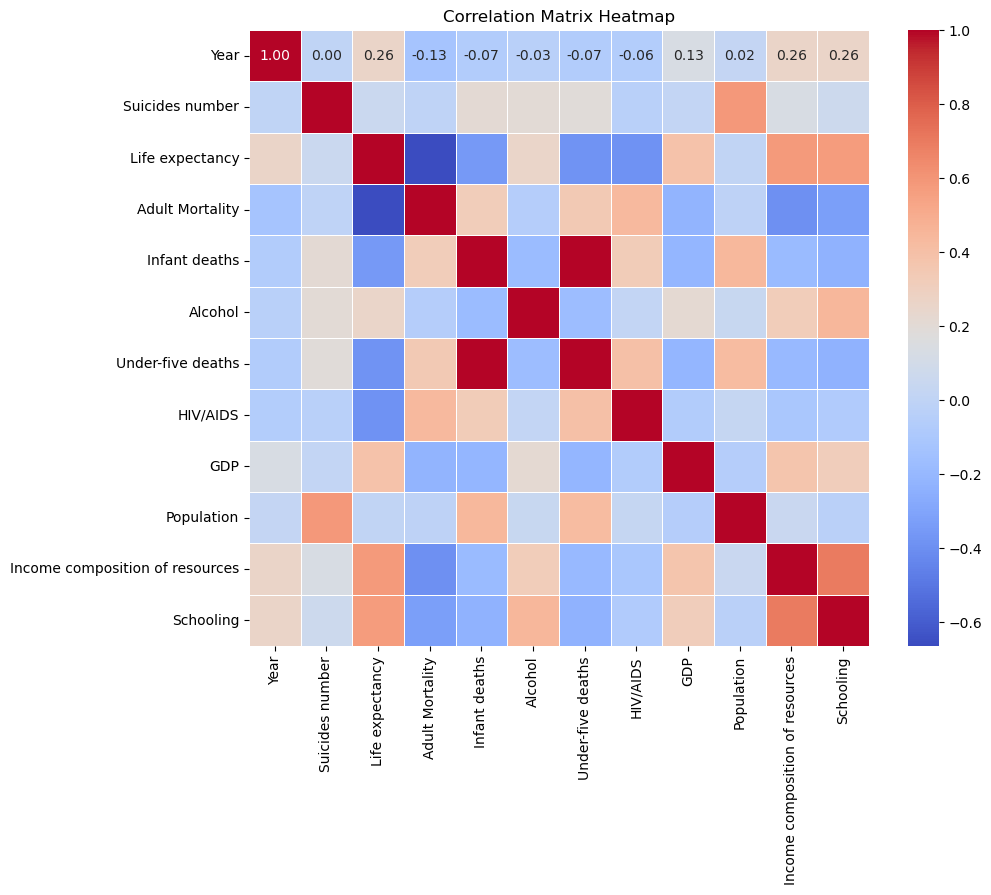

In [17]:
# create a correlation heatmap for variables
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

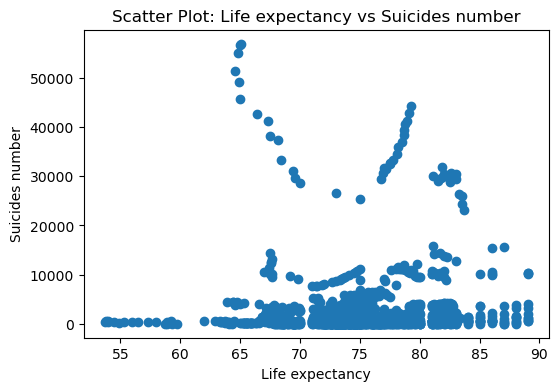

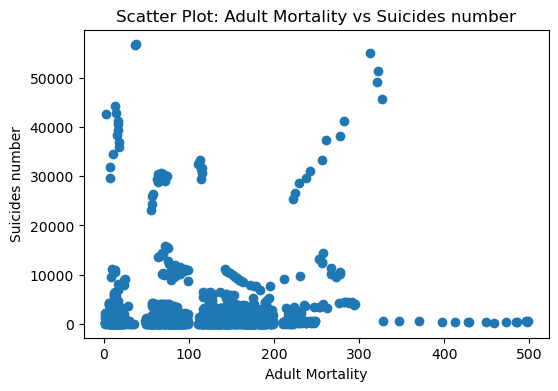

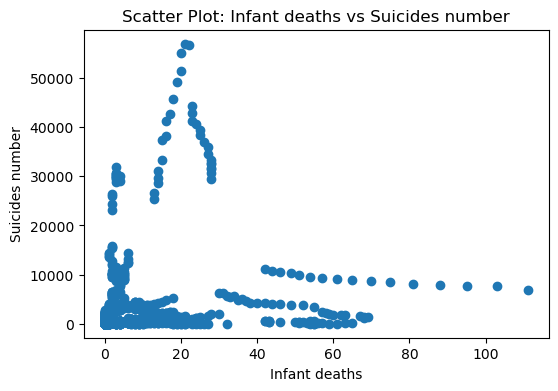

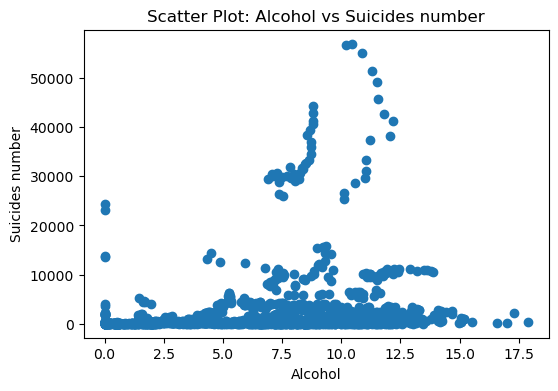

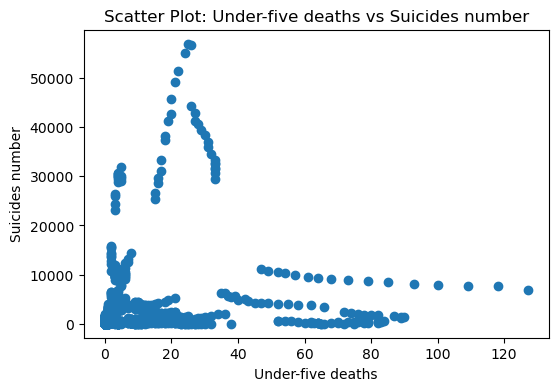

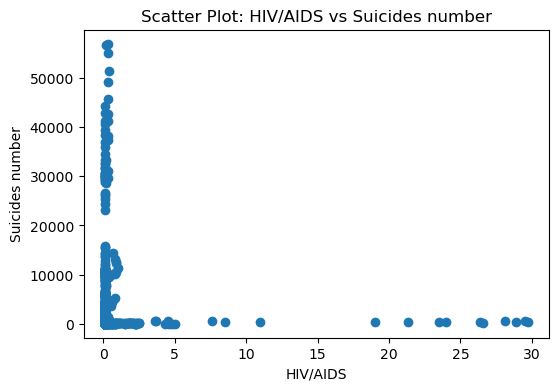

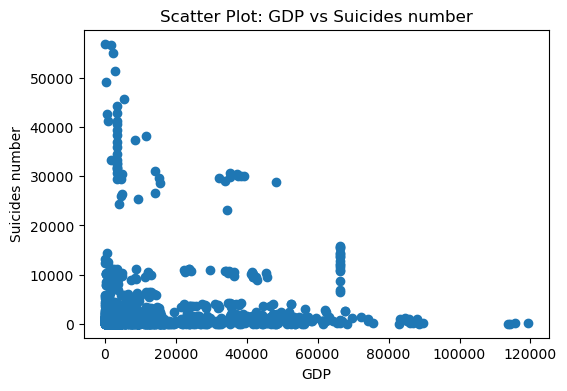

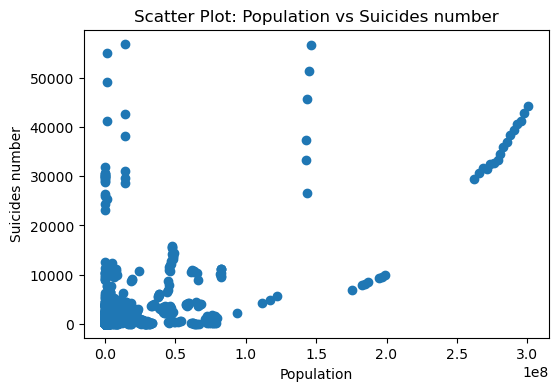

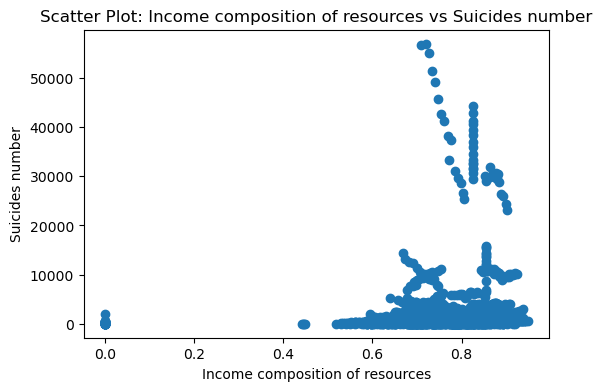

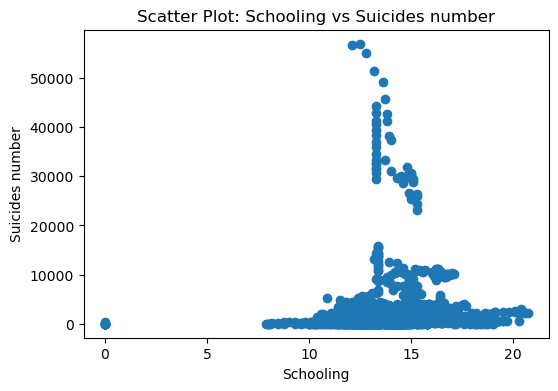

In [18]:
# Visualize the relationship between each predictor and the target using scatter plots
X = df[['Life expectancy', 'Adult Mortality', 'Infant deaths', 'Alcohol', 'Under-five deaths', 'HIV/AIDS', 'GDP', 'Population', 'Income composition of resources', 'Schooling']]
for column in X.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[column], df['Suicides number'])
    plt.title(f'Scatter Plot: {column} vs Suicides number')
    plt.xlabel(column)
    plt.ylabel('Suicides number')
    plt.show()

In [19]:
# Function to remove outliers based on IQR
def remove_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds to filter outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only the values within the bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


columns_to_remove_outliers = ['Suicides number', 'Life expectancy', 'Adult Mortality', 'Infant deaths', 'Alcohol', 'Under-five deaths', 'HIV/AIDS', 'GDP', 'Population', 'Income composition of resources', 'Schooling']

# Apply the remove_outliers function to each specified column
for column in columns_to_remove_outliers:
    df = remove_outliers(column)

# Display the DataFrame after removing outliers
print(df)

      Country  Year  Suicides number  Life expectancy  Adult Mortality  \
0     Albania  2000             54.0             72.6             11.0   
1     Albania  2001            119.0             73.6             14.0   
2     Albania  2002            133.0             73.3             15.0   
3     Albania  2003            124.0             72.8             18.0   
4     Albania  2004            146.0             73.0             17.0   
...       ...   ...              ...              ...              ...   
1390  Uruguay  2010            547.0             76.3            118.0   
1391  Uruguay  2012            599.0             76.5            118.0   
1392  Uruguay  2013            546.0             76.8            117.0   
1393  Uruguay  2014            591.0             76.8            117.0   
1394  Uruguay  2015            630.0             77.0            116.0   

      Infant deaths  Alcohol  Under-five deaths  HIV/AIDS           GDP  \
0                 1     3.66        

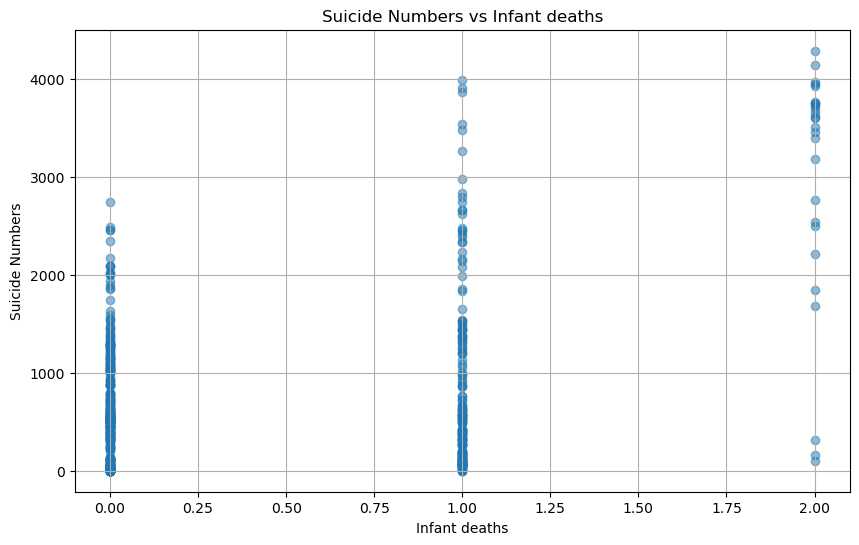

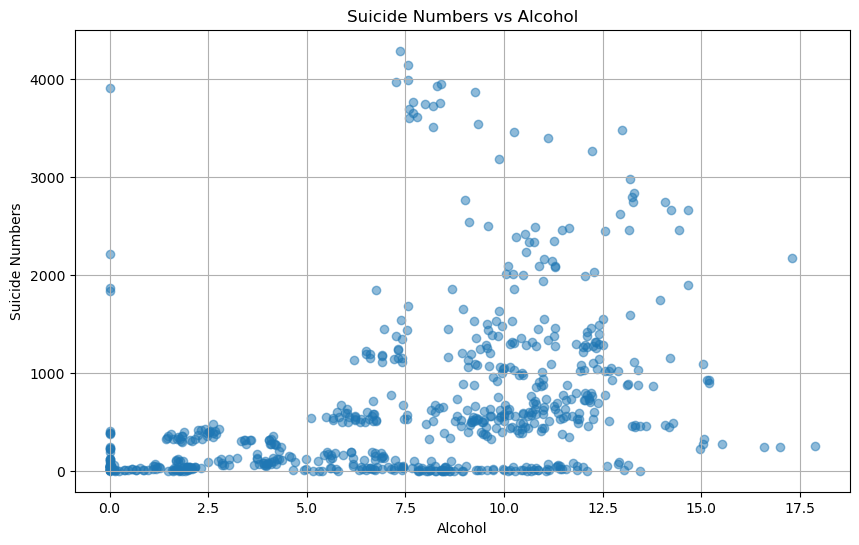

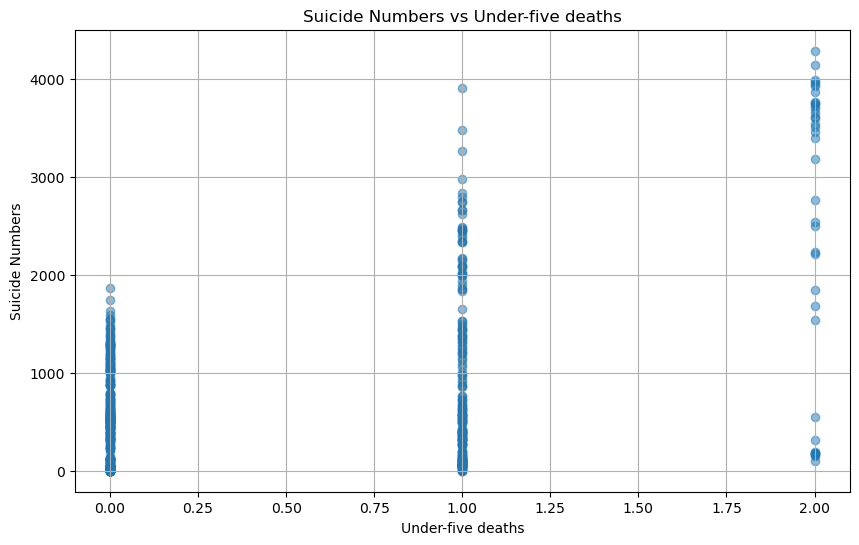

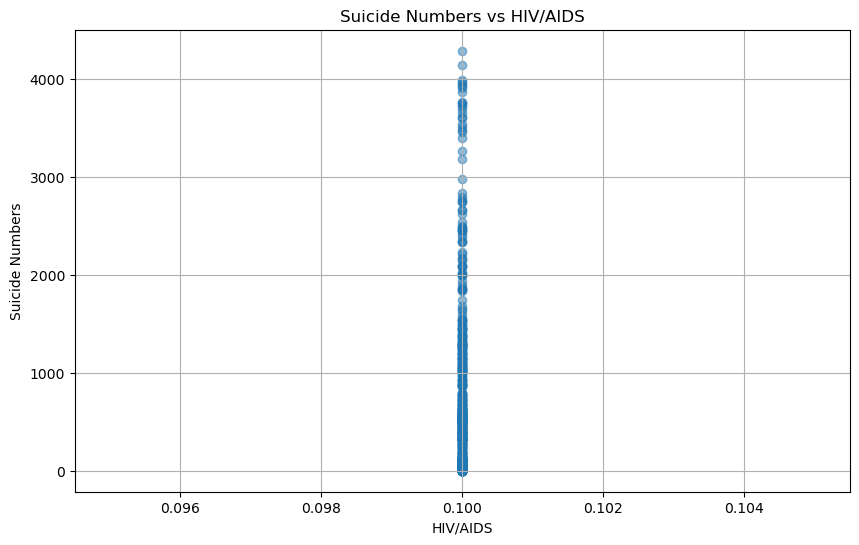

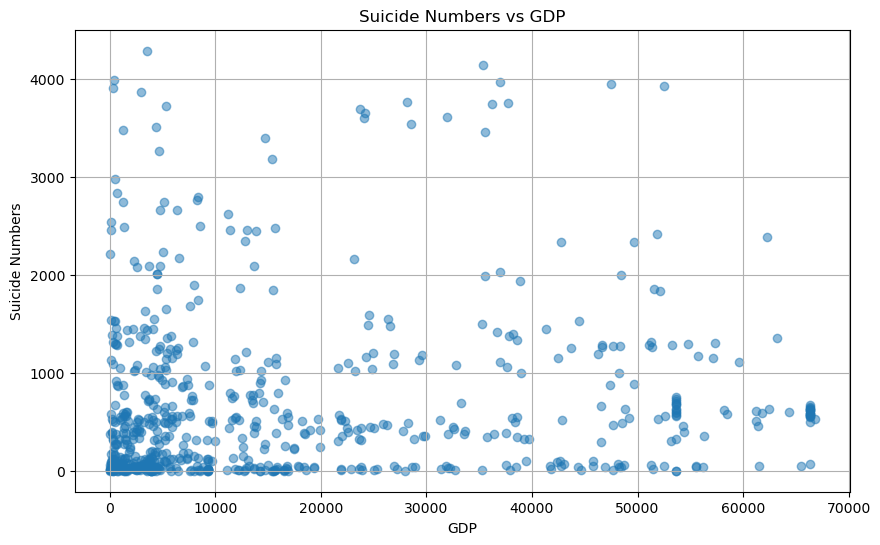

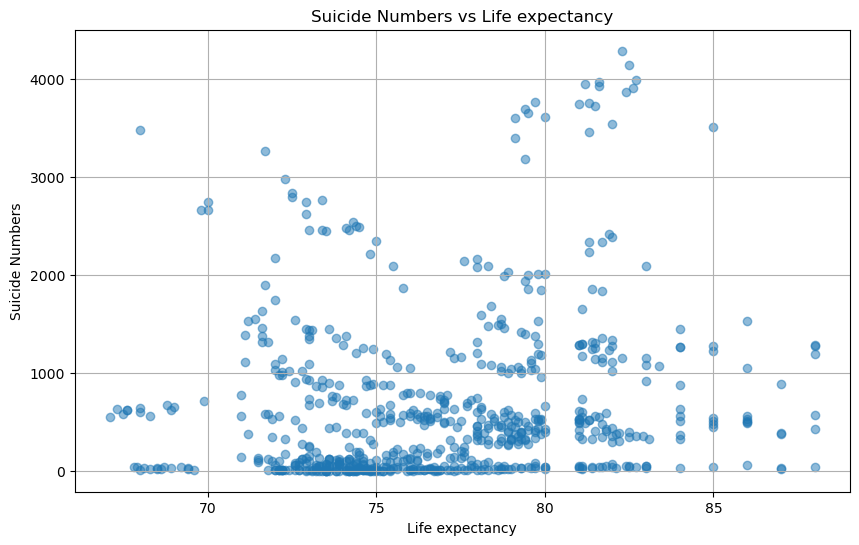

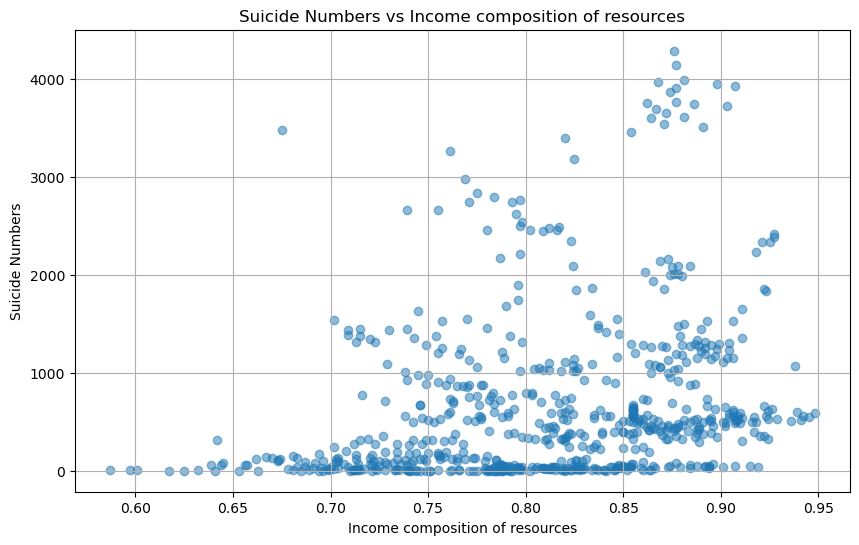

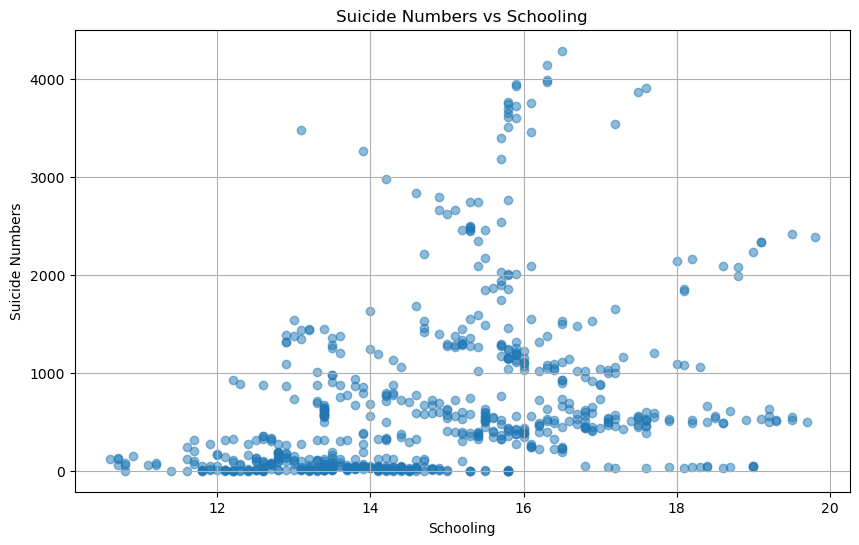

In [12]:
# List of factors to plot against suicide numbers
factors_to_plot = ['Infant deaths', 'Alcohol', 'Under-five deaths', 'HIV/AIDS', 'GDP', 'Life expectancy', 'Income composition of resources', 'Schooling']

# Loop through each factor and create a scatter plot
for factor in factors_to_plot:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[factor], df['Suicides number'], alpha=0.5)
    plt.title(f'Suicide Numbers vs {factor}')
    plt.xlabel(factor)
    plt.ylabel('Suicide Numbers')
    plt.grid(True)
    plt.show()

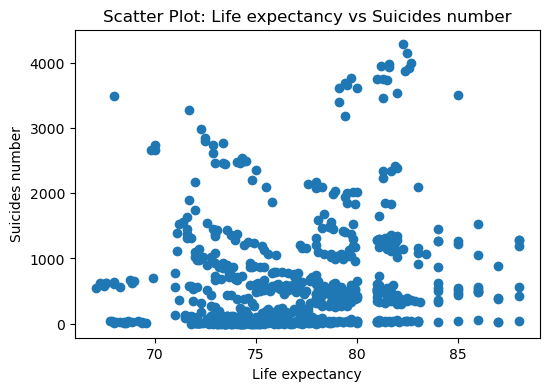

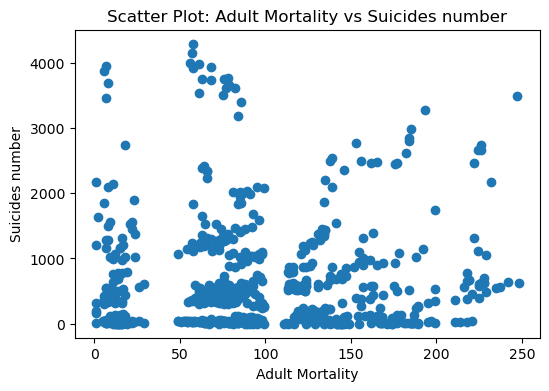

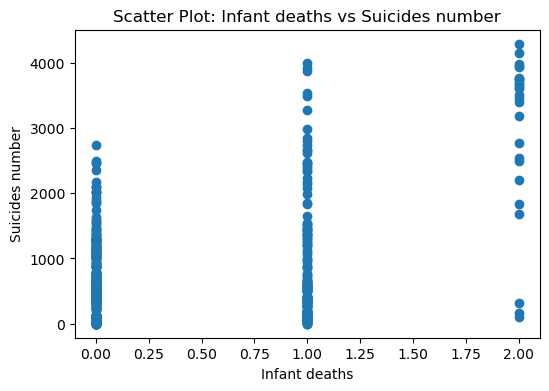

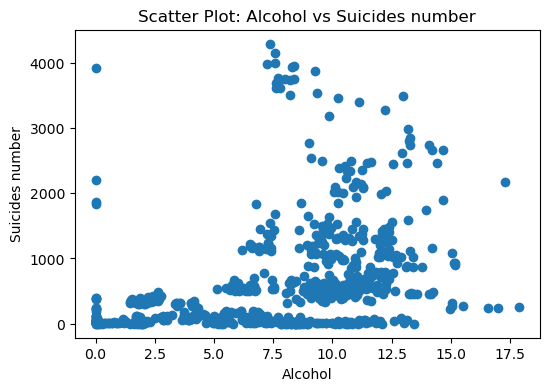

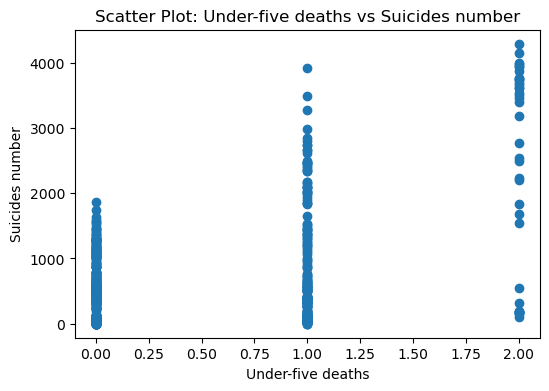

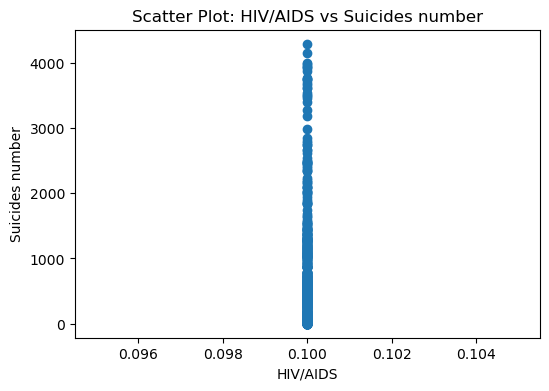

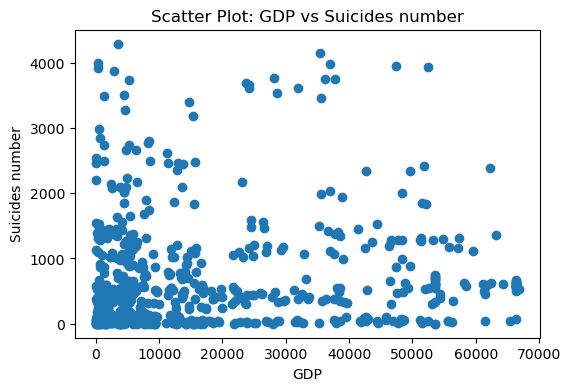

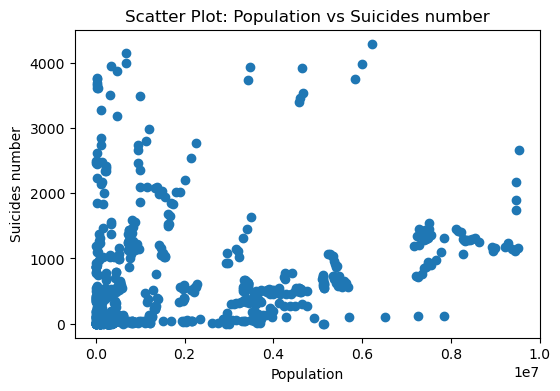

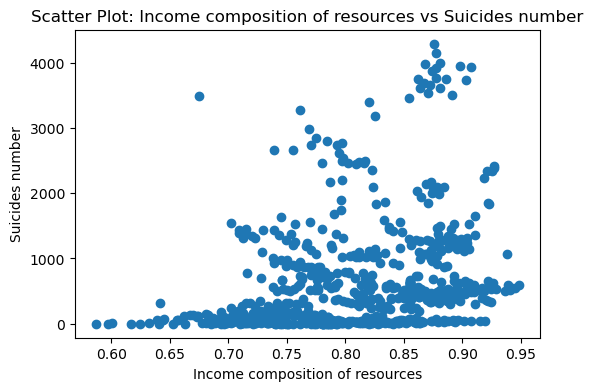

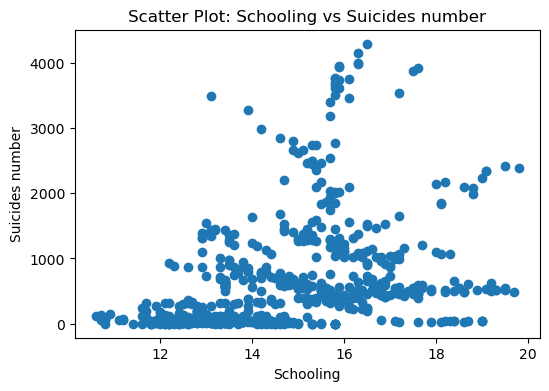

In [13]:
# Visualize the relationship between each predictor and the target using scatter plots
for column in X.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[column], df['Suicides number'])
    plt.title(f'Scatter Plot: {column} vs Suicides number')
    plt.xlabel(column)
    plt.ylabel('Suicides number')
    plt.show()

In [14]:
correlation_matrix = df.corr()
print(correlation_matrix['Suicides number'])

Suicides number                    1.000000
Life expectancy                    0.162693
Adult Mortality                   -0.003569
Infant deaths                      0.459032
Alcohol                            0.380710
Under-five deaths                  0.505052
HIV/AIDS                                NaN
GDP                                0.099265
Population                         0.208382
Income composition of resources    0.278199
Schooling                          0.347601
Name: Suicides number, dtype: float64


dropping the variables with NaN correlation

In [15]:
df = df.drop(columns=['HIV/AIDS'])

# Display the DataFrame after dropping the columns
print(df.head())

   Suicides number  Life expectancy  Adult Mortality  Infant deaths  Alcohol  \
0             54.0             72.6             11.0              1     3.66   
1            119.0             73.6             14.0              1     4.25   
2            133.0             73.3             15.0              1     3.73   
3            124.0             72.8             18.0              1     4.29   
4            146.0             73.0             17.0              1     4.54   

   Under-five deaths          GDP  Population  \
0                  1  1175.788981     38927.0   
1                  1  1326.973390     36173.0   
2                  1  1453.642777      3511.0   
3                  1   189.681557    339616.0   
4                  1  2416.588235    326939.0   

   Income composition of resources  Schooling  
0                            0.656       10.7  
1                            0.662       10.6  
2                            0.670       10.7  
3                            0.6

In [16]:
# Determine X and y values
X = df[["Adult Mortality"]]
y = df["Suicides number"]

# Create an OLS model
model = sm.OLS(endog=y, exog=sm.add_constant(X))
# Get model results
results = model.fit()

# Display results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Suicides number   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.008621
Date:                Mon, 29 Jan 2024   Prob (F-statistic):              0.926
Time:                        10:02:55   Log-Likelihood:                -5542.3
No. Observations:                 679   AIC:                         1.109e+04
Df Residuals:                     677   BIC:                         1.110e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             669.1317     64.077     

We will drop Adult morality because it is not significant.

In [17]:
# Determine X and y values
X = df[["Life expectancy"]]
y = df["Suicides number"]

# Create an OLS model
model = sm.OLS(endog=y, exog=sm.add_constant(X))
# Get model results
results = model.fit()

# Display results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Suicides number   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     18.41
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           2.04e-05
Time:                        10:02:55   Log-Likelihood:                -5533.2
No. Observations:                 679   AIC:                         1.107e+04
Df Residuals:                     677   BIC:                         1.108e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1929.4406    605.345     

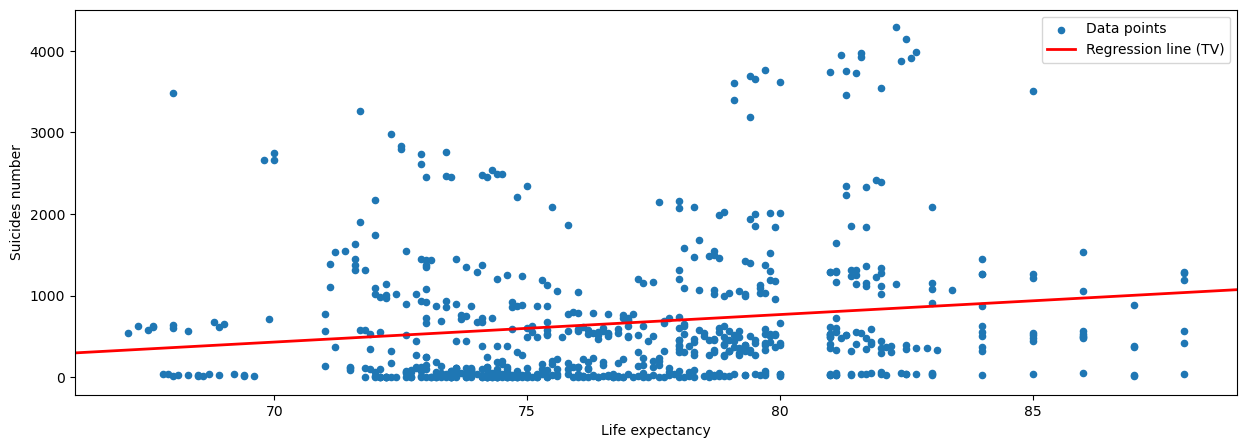

In [18]:
# abline_plot version of model fit
fig, ax = plt.subplots(figsize=(15,5))
df.plot(x="Life expectancy", y="Suicides number", kind="scatter", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results, label="Regression line (TV)", c="red", linewidth=2, ax=ax)
ax.legend()
plt.show()

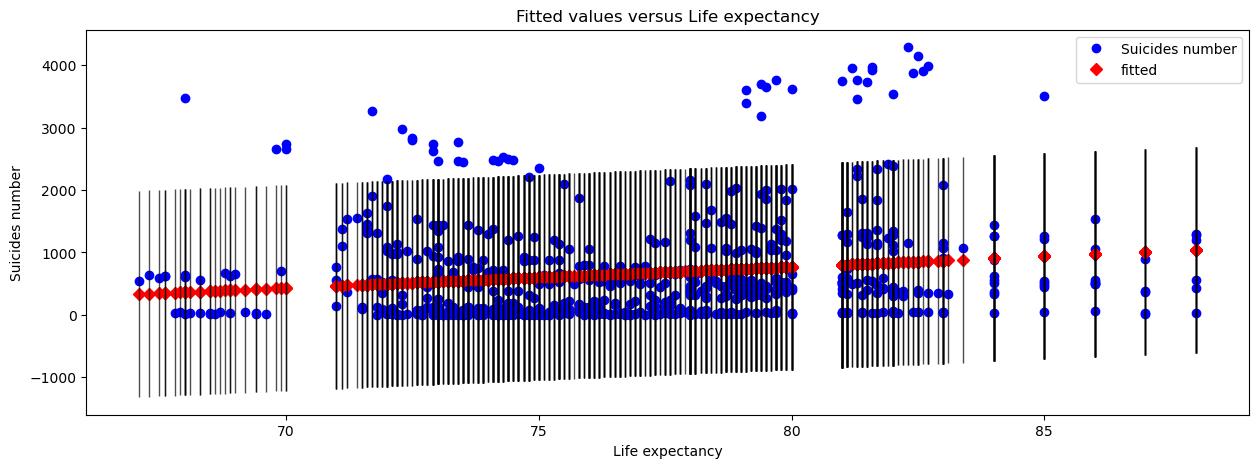

In [19]:
# plot_fit version of model fit
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.plot_fit(results, "Life expectancy", ax=ax)
plt.show()

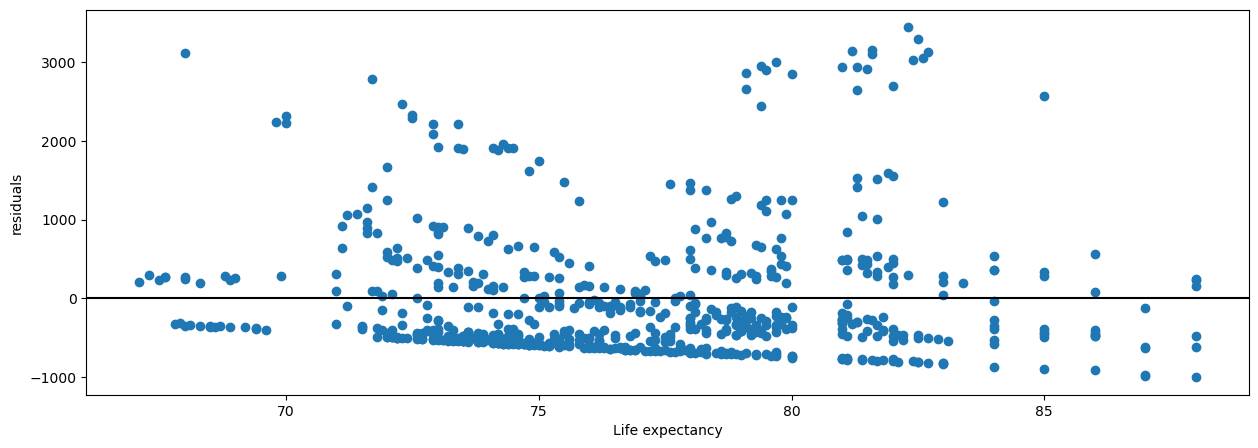

In [20]:
# Plotting residuals vs. Life expectancy

fig, ax = plt.subplots(figsize=(15,5))

ax.scatter(df["Life expectancy"], results.resid)
ax.axhline(y=0, color="black")

ax.set_xlabel("Life expectancy")
ax.set_ylabel("residuals");

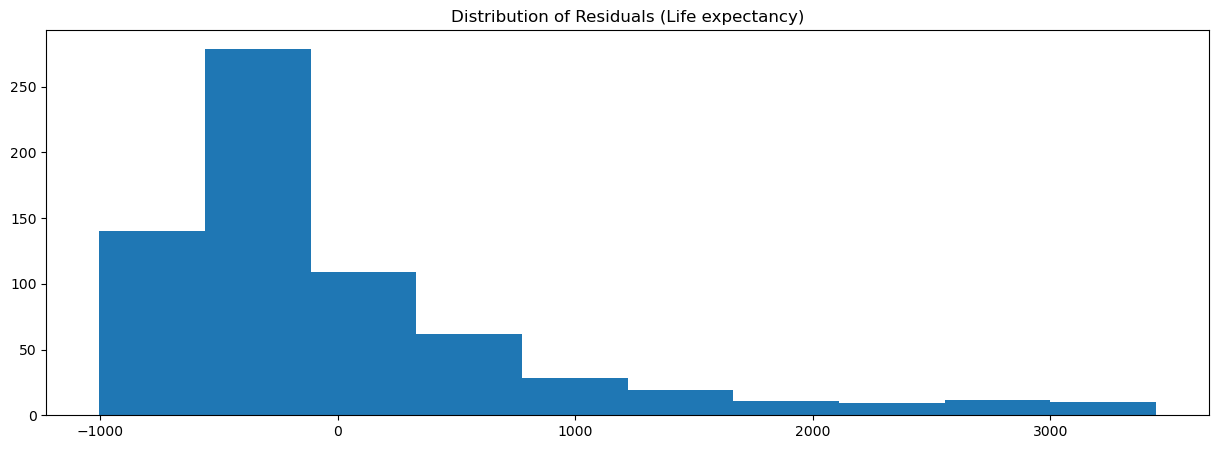

In [21]:
# Plotting residual histogram
fig, ax = plt.subplots(figsize=(15,5))

ax.hist(results.resid)
ax.set_title("Distribution of Residuals (Life expectancy)");

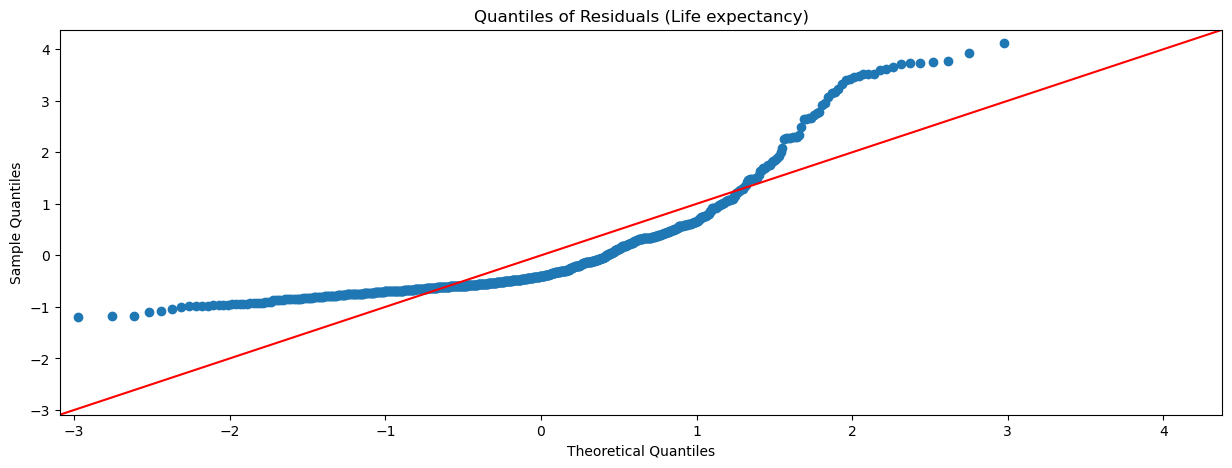

In [22]:
# Plotting residual Q-Q plot
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.qqplot(results.resid, dist=norm, line="45", fit=True, ax=ax)
ax.set_title("Quantiles of Residuals (Life expectancy)")
plt.show()

In [23]:
# Determine X and y values
X = df[["Infant deaths"]]
y = df["Suicides number"]

# Create an OLS model
model = sm.OLS(endog=y, exog=sm.add_constant(X))
# Get model results
results = model.fit()

# Display results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Suicides number   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     180.7
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           1.09e-36
Time:                        10:03:00   Log-Likelihood:                -5462.0
No. Observations:                 679   AIC:                         1.093e+04
Df Residuals:                     677   BIC:                         1.094e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           414.7570     34.398     12.057

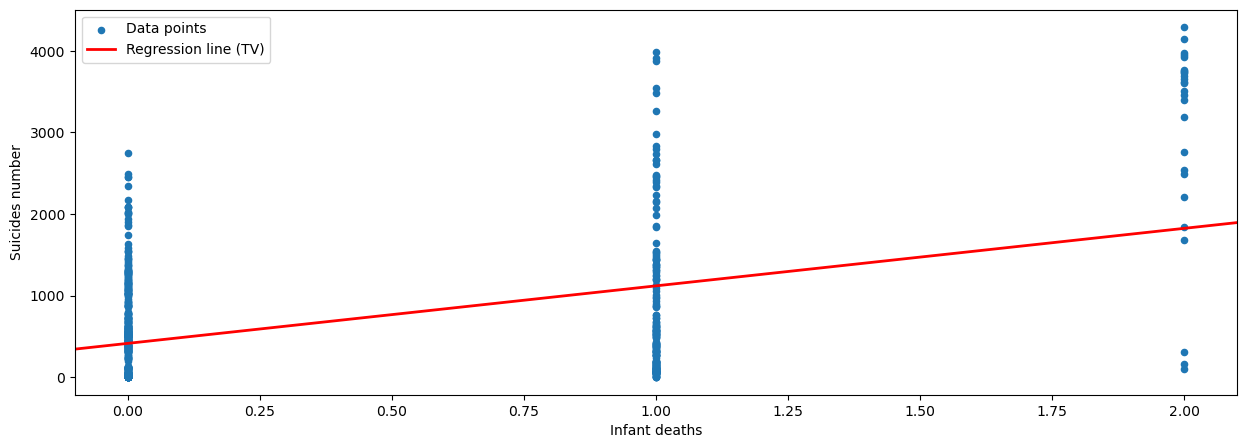

In [24]:
# abline_plot version of model fit
fig, ax = plt.subplots(figsize=(15,5))
df.plot(x="Infant deaths", y="Suicides number", kind="scatter", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results, label="Regression line (TV)", c="red", linewidth=2, ax=ax)
ax.legend()
plt.show()

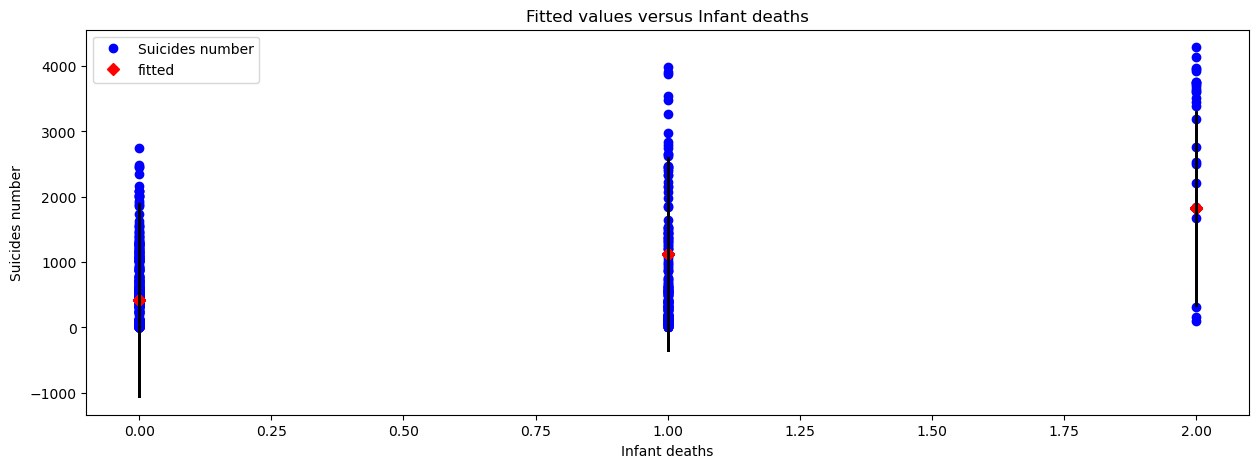

In [25]:
# plot_fit version of model fit
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.plot_fit(results, "Infant deaths", ax=ax)
plt.show()

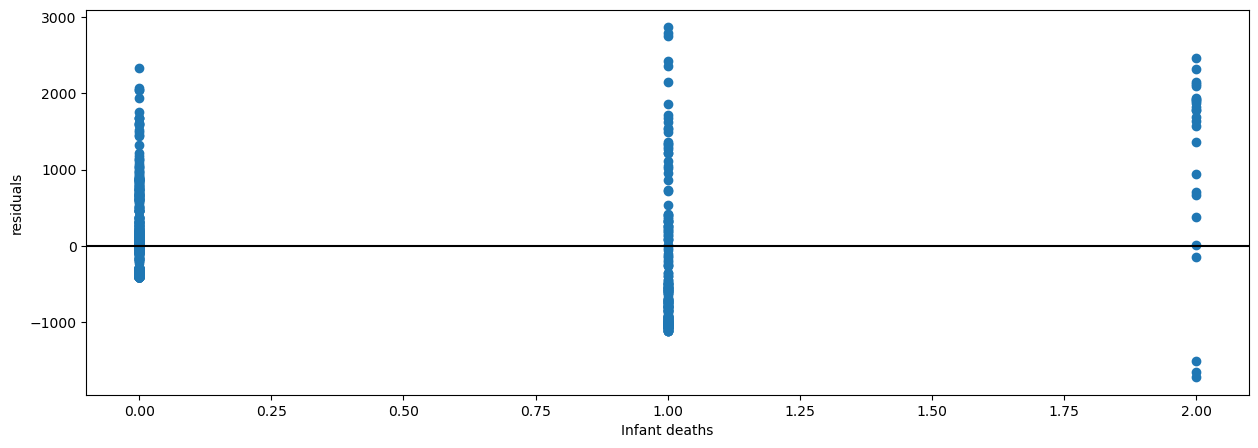

In [26]:
# Plotting residuals vs. Infant deaths

fig, ax = plt.subplots(figsize=(15,5))

ax.scatter(df["Infant deaths"], results.resid)
ax.axhline(y=0, color="black")

ax.set_xlabel("Infant deaths")
ax.set_ylabel("residuals");

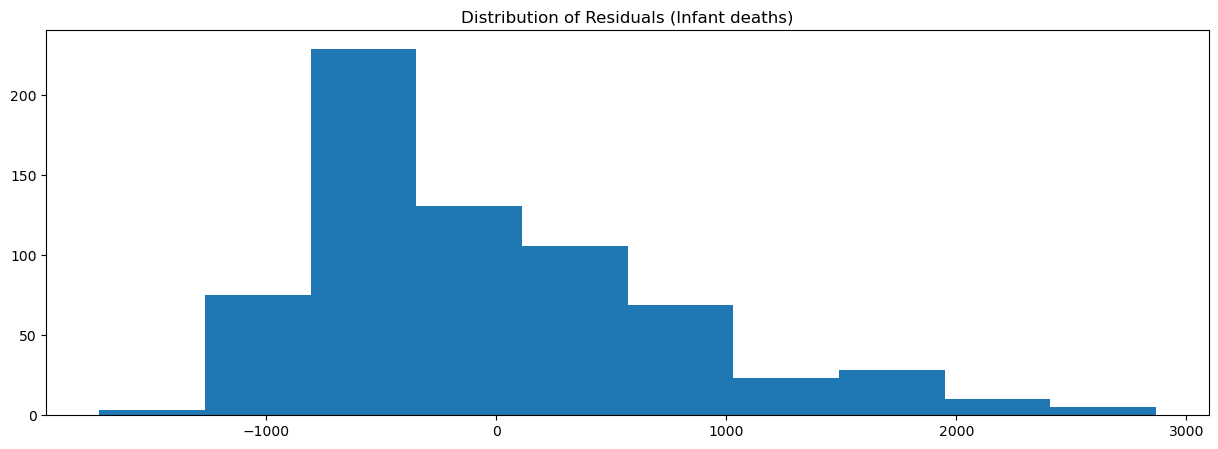

In [27]:
# Plotting residual histogram
fig, ax = plt.subplots(figsize=(15,5))

ax.hist(results.resid)
ax.set_title("Distribution of Residuals (Infant deaths)");

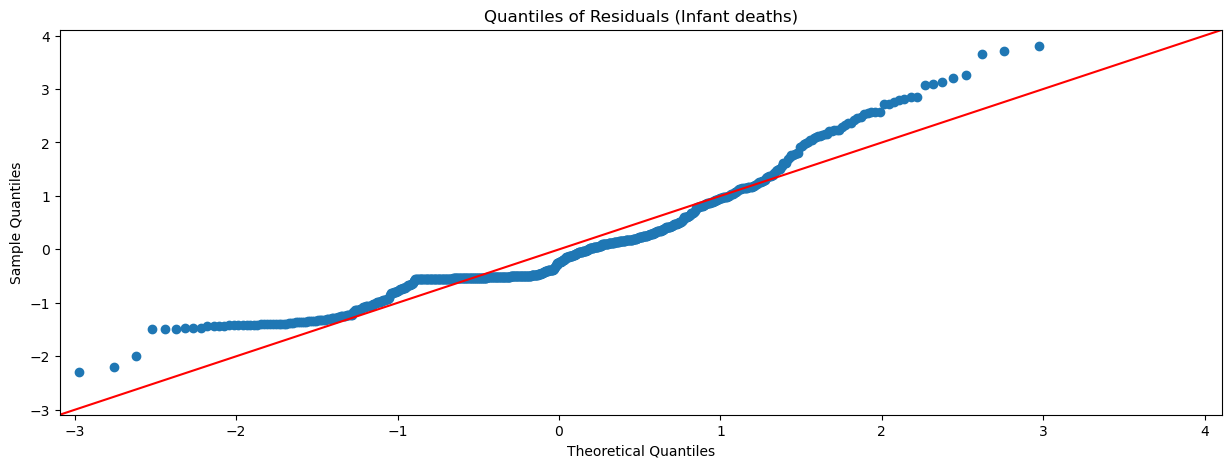

In [28]:
# Plotting residual Q-Q plot
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.qqplot(results.resid, dist=norm, line="45", fit=True, ax=ax)
ax.set_title("Quantiles of Residuals (Infant deaths)")
plt.show()

In [29]:
# Determine X and y values
X = df[["Alcohol"]]
y = df["Suicides number"]

# Create an OLS model
model = sm.OLS(endog=y, exog=sm.add_constant(X))
# Get model results
results = model.fit()

# Display results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Suicides number   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     114.8
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           7.64e-25
Time:                        10:03:05   Log-Likelihood:                -5489.2
No. Observations:                 679   AIC:                         1.098e+04
Df Residuals:                     677   BIC:                         1.099e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.5727     61.929      1.366      0.1

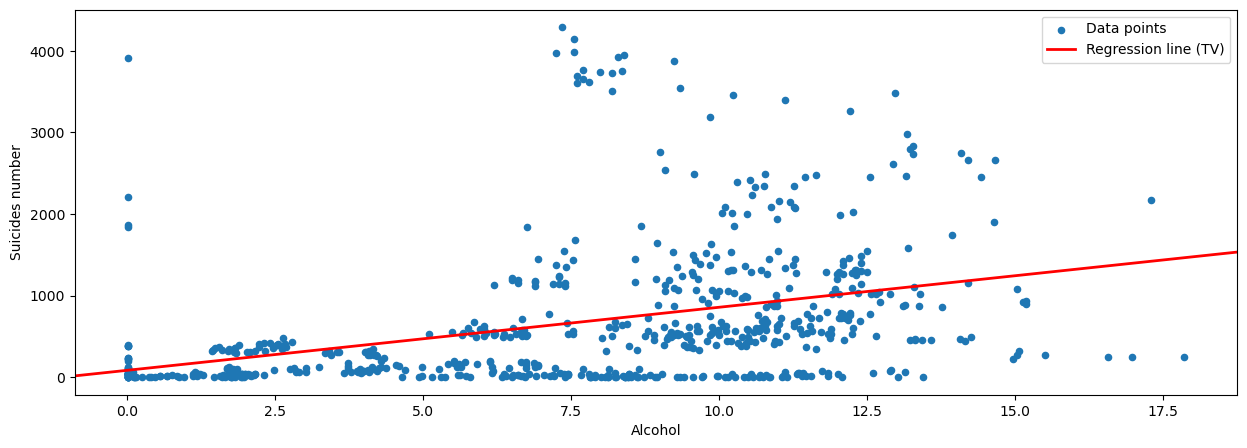

In [30]:
# abline_plot version of model fit
fig, ax = plt.subplots(figsize=(15,5))
df.plot(x="Alcohol", y="Suicides number", kind="scatter", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results, label="Regression line (TV)", c="red", linewidth=2, ax=ax)
ax.legend()
plt.show()

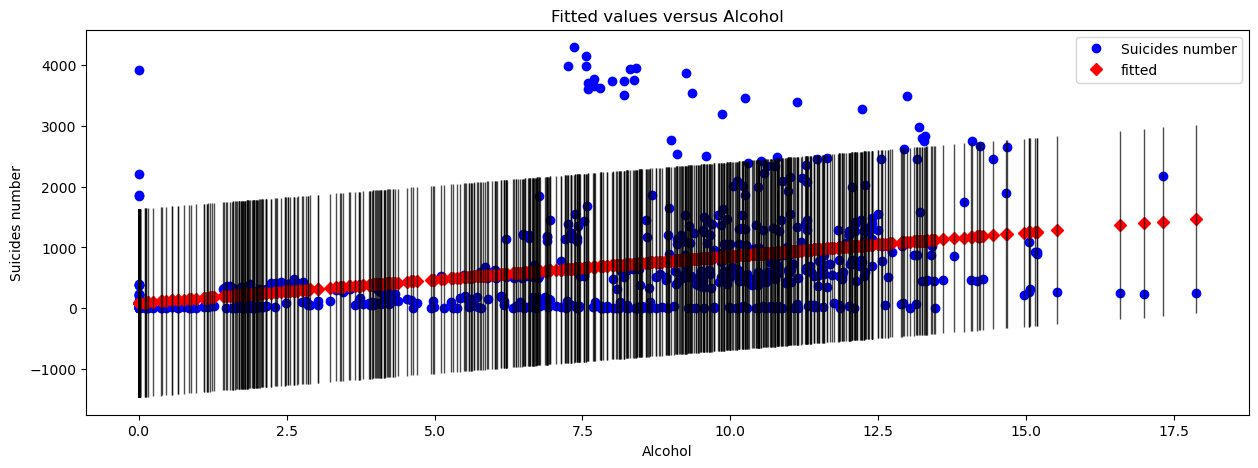

In [31]:
# plot_fit version of model fit
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.plot_fit(results, "Alcohol", ax=ax)
plt.show()

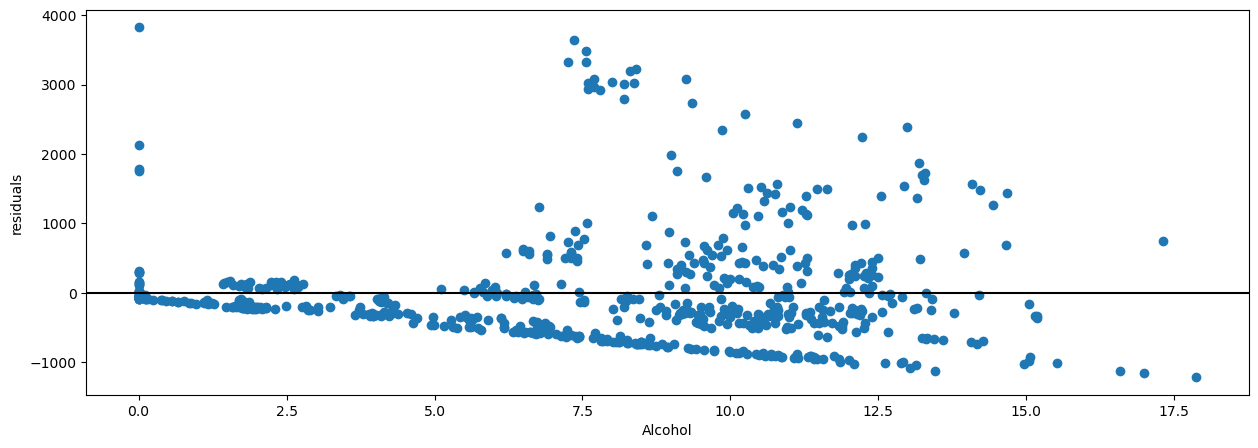

In [32]:
# Plotting residuals vs. Alcohol

fig, ax = plt.subplots(figsize=(15,5))

ax.scatter(df["Alcohol"], results.resid)
ax.axhline(y=0, color="black")

ax.set_xlabel("Alcohol")
ax.set_ylabel("residuals");

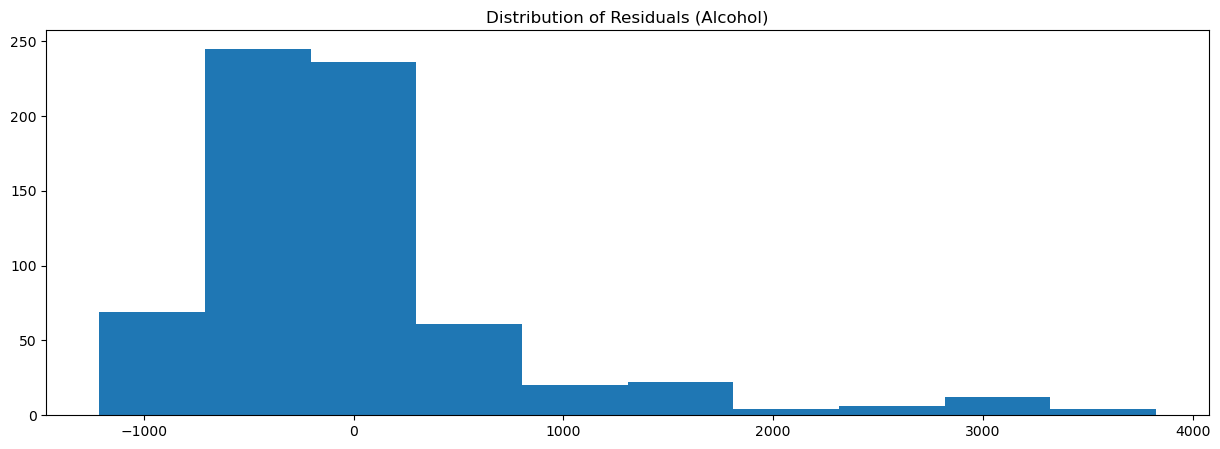

In [33]:
# Plotting residual histogram
fig, ax = plt.subplots(figsize=(15,5))

ax.hist(results.resid)
ax.set_title("Distribution of Residuals (Alcohol)");

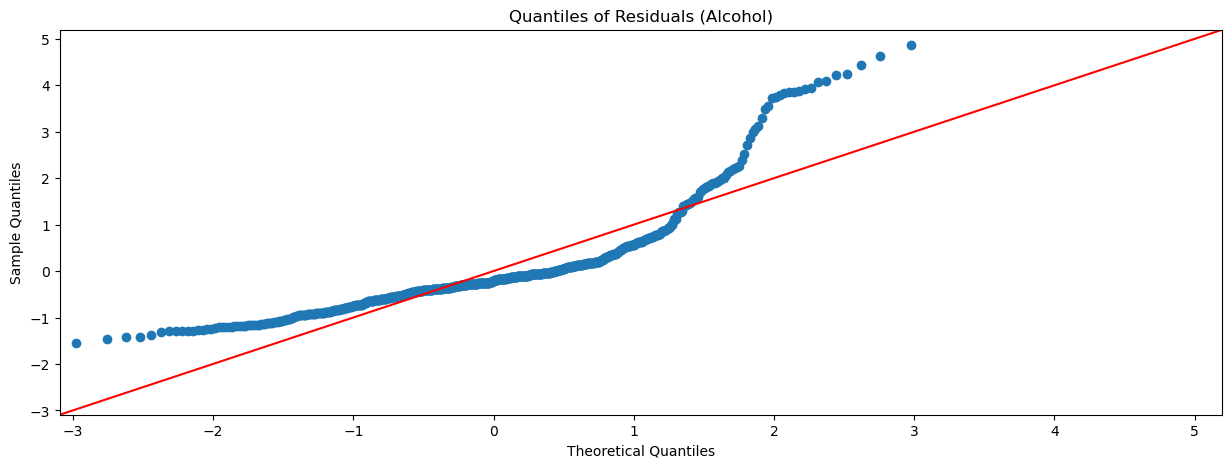

In [34]:
# Plotting residual Q-Q plot
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.qqplot(results.resid, dist=norm, line="45", fit=True, ax=ax)
ax.set_title("Quantiles of Residuals (Alcohol)")
plt.show()

In [35]:

# Determine X and y values
X = df[["Under-five deaths"]]
y = df["Suicides number"]

# Create an OLS model
model = sm.OLS(endog=y, exog=sm.add_constant(X))
# Get model results
results = model.fit()

# Display results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Suicides number   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     231.8
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           3.10e-45
Time:                        10:03:11   Log-Likelihood:                -5442.4
No. Observations:                 679   AIC:                         1.089e+04
Df Residuals:                     677   BIC:                         1.090e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               362.3043     34.42

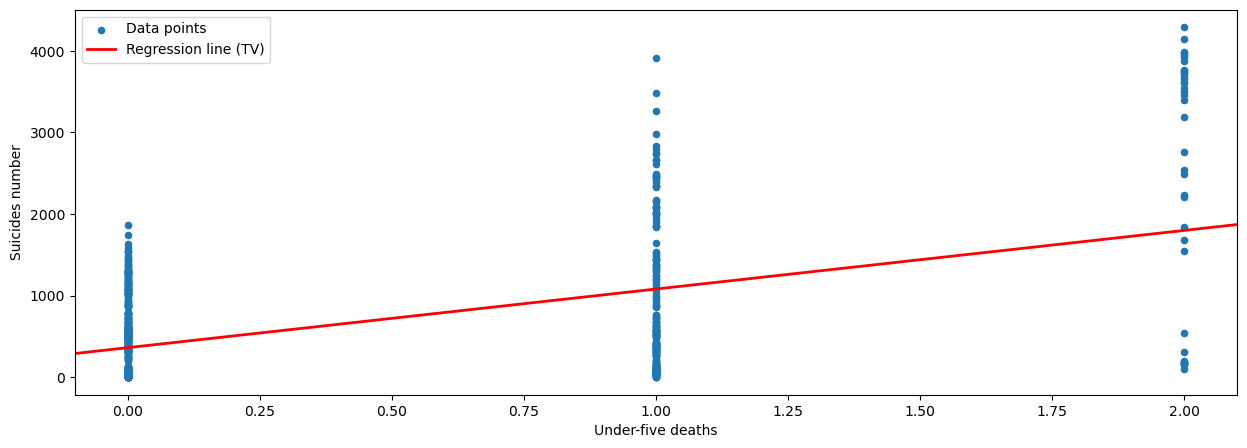

In [36]:
# abline_plot version of model fit
fig, ax = plt.subplots(figsize=(15,5))
df.plot(x="Under-five deaths", y="Suicides number", kind="scatter", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results, label="Regression line (TV)", c="red", linewidth=2, ax=ax)
ax.legend()
plt.show()

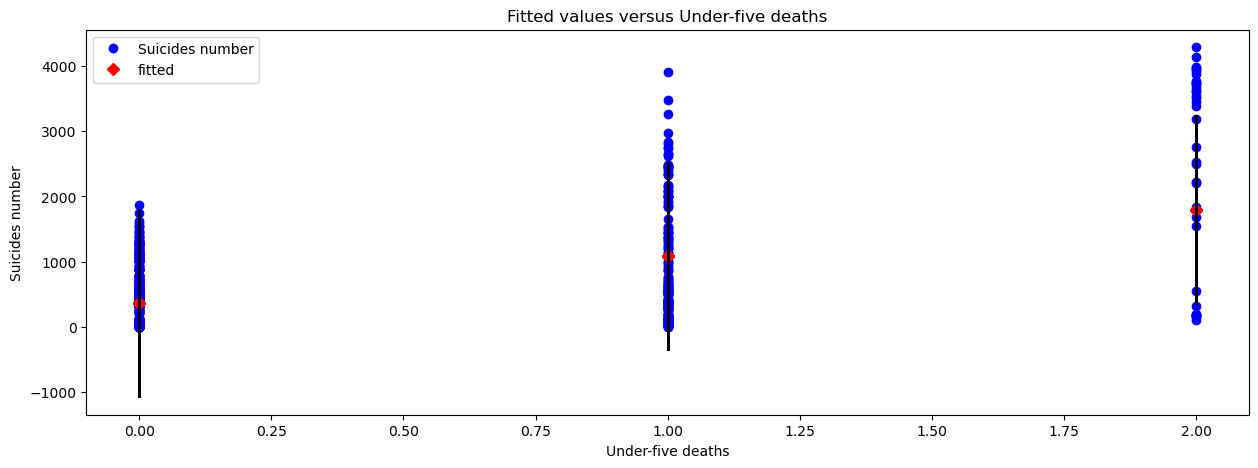

In [37]:
# plot_fit version of model fit
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.plot_fit(results, "Under-five deaths", ax=ax)
plt.show()

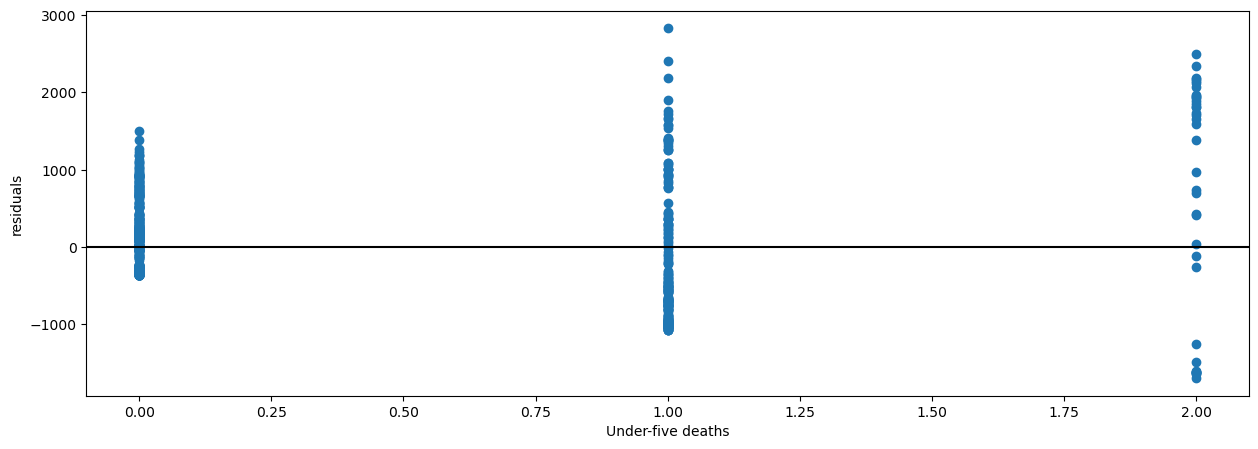

In [38]:
# Plotting residuals vs. Under-five deaths

fig, ax = plt.subplots(figsize=(15,5))

ax.scatter(df["Under-five deaths"], results.resid)
ax.axhline(y=0, color="black")

ax.set_xlabel("Under-five deaths")
ax.set_ylabel("residuals");

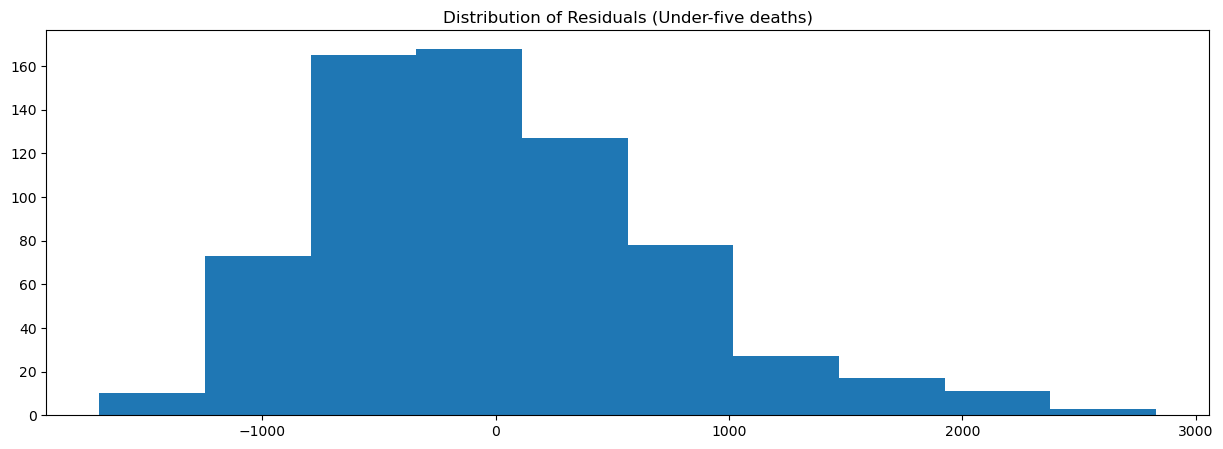

In [39]:
# Plotting residual histogram
fig, ax = plt.subplots(figsize=(15,5))

ax.hist(results.resid)
ax.set_title("Distribution of Residuals (Under-five deaths)");

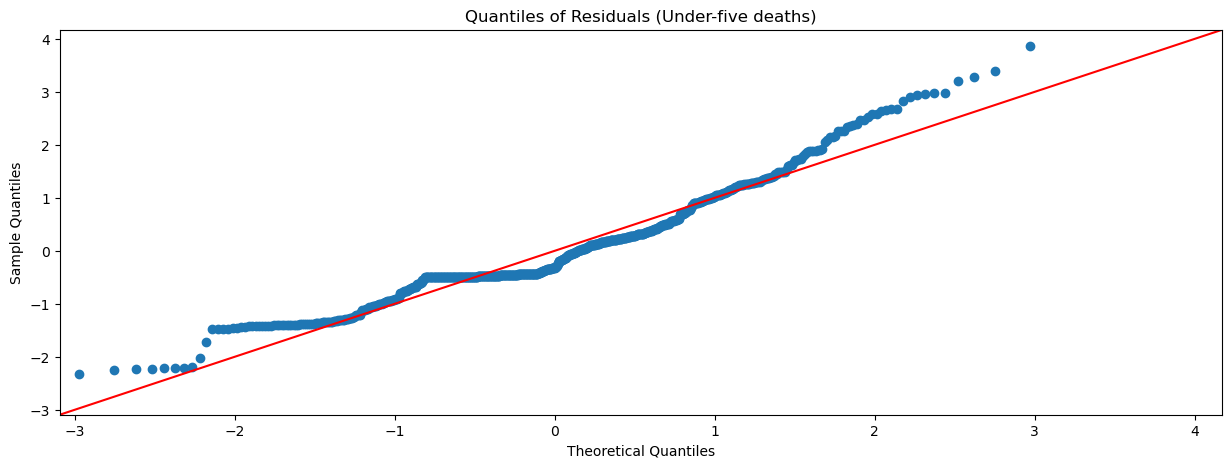

In [40]:
# Plotting residual Q-Q plot
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.qqplot(results.resid, dist=norm, line="45", fit=True, ax=ax)
ax.set_title("Quantiles of Residuals (Under-five deaths)")
plt.show()

In [41]:

# Determine X and y values
X = df[["GDP"]]
y = df["Suicides number"]

# Create an OLS model
model = sm.OLS(endog=y, exog=sm.add_constant(X))
# Get model results
results = model.fit()

# Display results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Suicides number   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.737
Date:                Mon, 29 Jan 2024   Prob (F-statistic):            0.00965
Time:                        10:03:15   Log-Likelihood:                -5539.0
No. Observations:                 679   AIC:                         1.108e+04
Df Residuals:                     677   BIC:                         1.109e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        588.2416     43.649     13.477      0.0

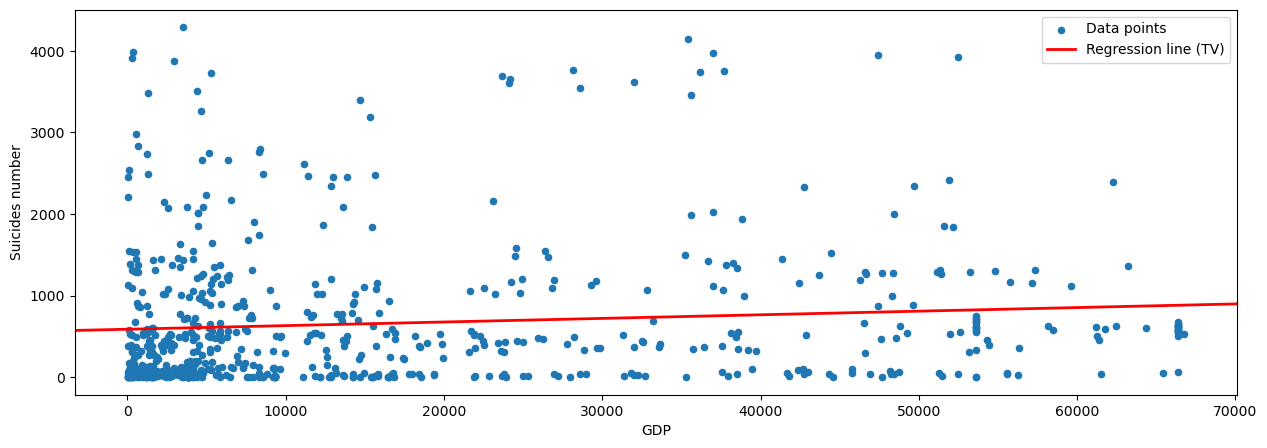

In [42]:
# abline_plot version of model fit
fig, ax = plt.subplots(figsize=(15,5))
df.plot(x="GDP", y="Suicides number", kind="scatter", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results, label="Regression line (TV)", c="red", linewidth=2, ax=ax)
ax.legend()
plt.show()

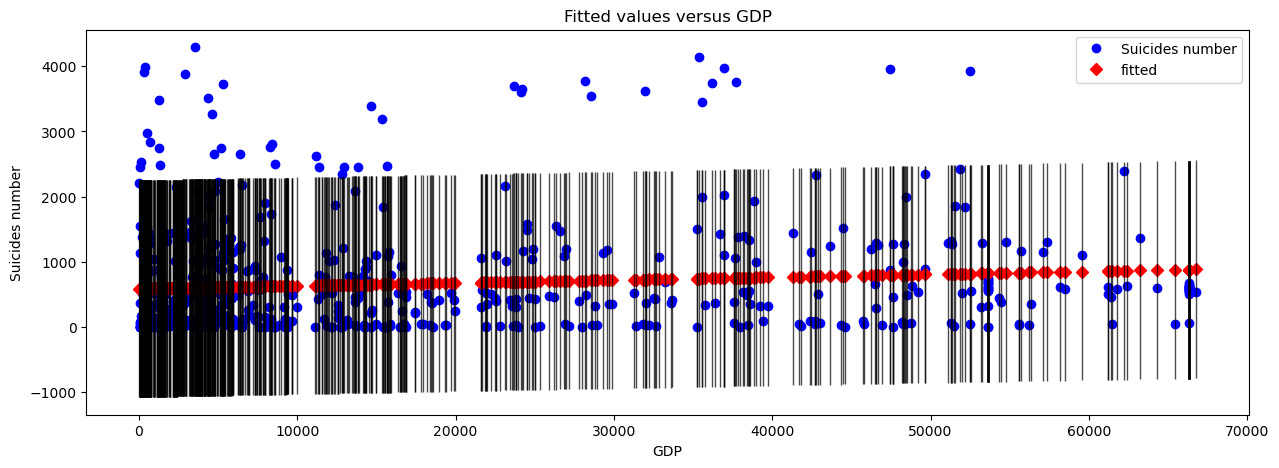

In [43]:
# plot_fit version of model fit
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.plot_fit(results, "GDP", ax=ax)
plt.show()

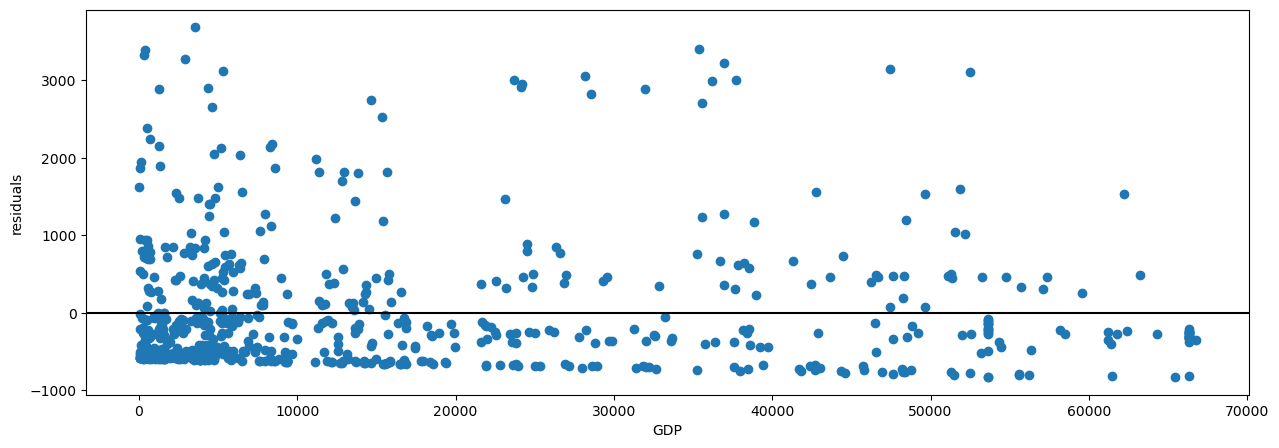

In [44]:
# Plotting residuals vs. GDP

fig, ax = plt.subplots(figsize=(15,5))

ax.scatter(df["GDP"], results.resid)
ax.axhline(y=0, color="black")

ax.set_xlabel("GDP")
ax.set_ylabel("residuals");

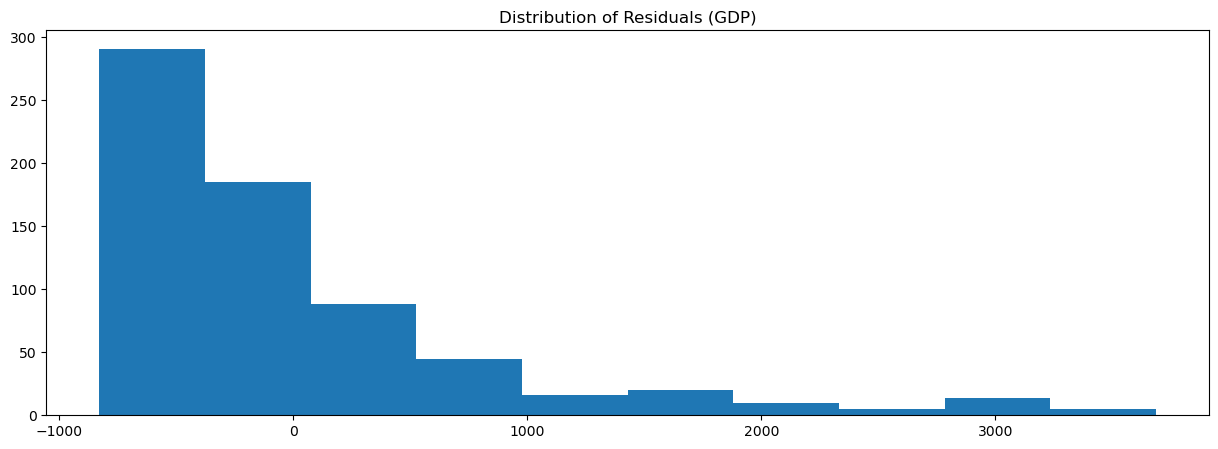

In [45]:
# Plotting residual histogram
fig, ax = plt.subplots(figsize=(15,5))

ax.hist(results.resid)
ax.set_title("Distribution of Residuals (GDP)");

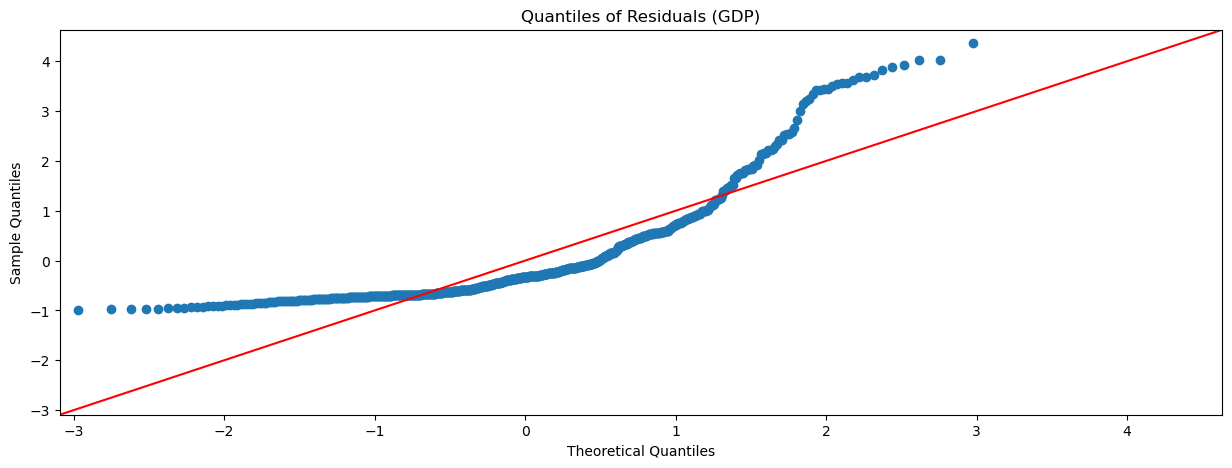

In [46]:
# Plotting residual Q-Q plot
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.qqplot(results.resid, dist=norm, line="45", fit=True, ax=ax)
ax.set_title("Quantiles of Residuals (GDP)")
plt.show()

In [47]:

# Determine X and y values
X = df[["Population"]]
y = df["Suicides number"]

# Create an OLS model
model = sm.OLS(endog=y, exog=sm.add_constant(X))
# Get model results
results = model.fit()

# Display results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Suicides number   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     30.73
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           4.25e-08
Time:                        10:03:18   Log-Likelihood:                -5527.3
No. Observations:                 679   AIC:                         1.106e+04
Df Residuals:                     677   BIC:                         1.107e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        520.7857     41.048     12.687      0.0

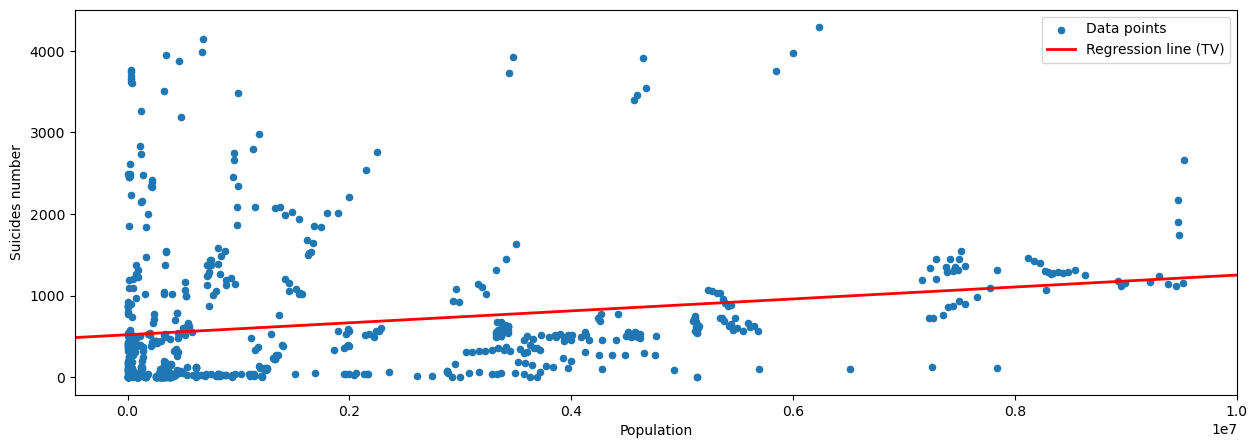

In [48]:
# abline_plot version of model fit
fig, ax = plt.subplots(figsize=(15,5))
df.plot(x="Population", y="Suicides number", kind="scatter", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results, label="Regression line (TV)", c="red", linewidth=2, ax=ax)
ax.legend()
plt.show()

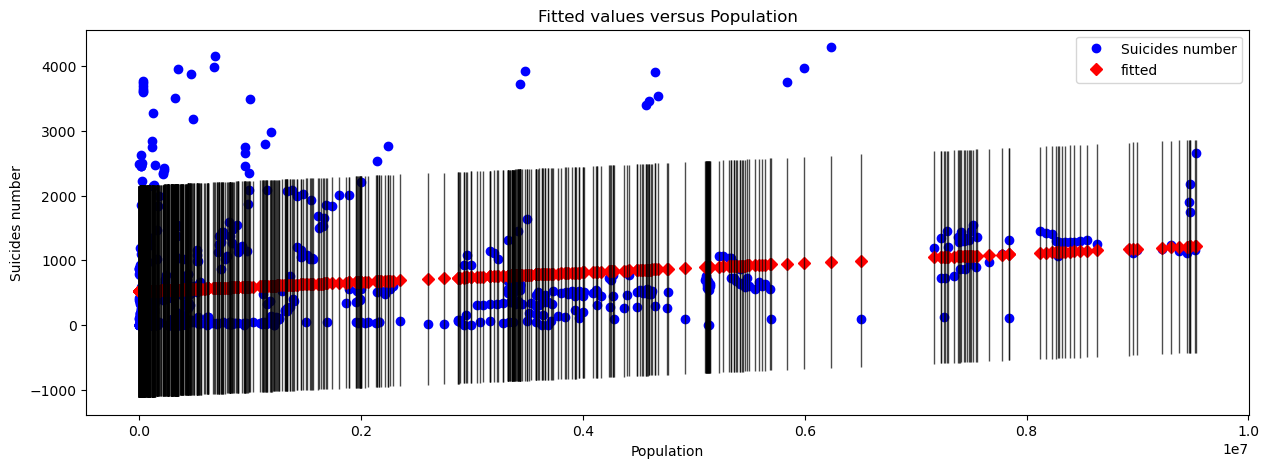

In [49]:
# plot_fit version of model fit
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.plot_fit(results, "Population", ax=ax)
plt.show()

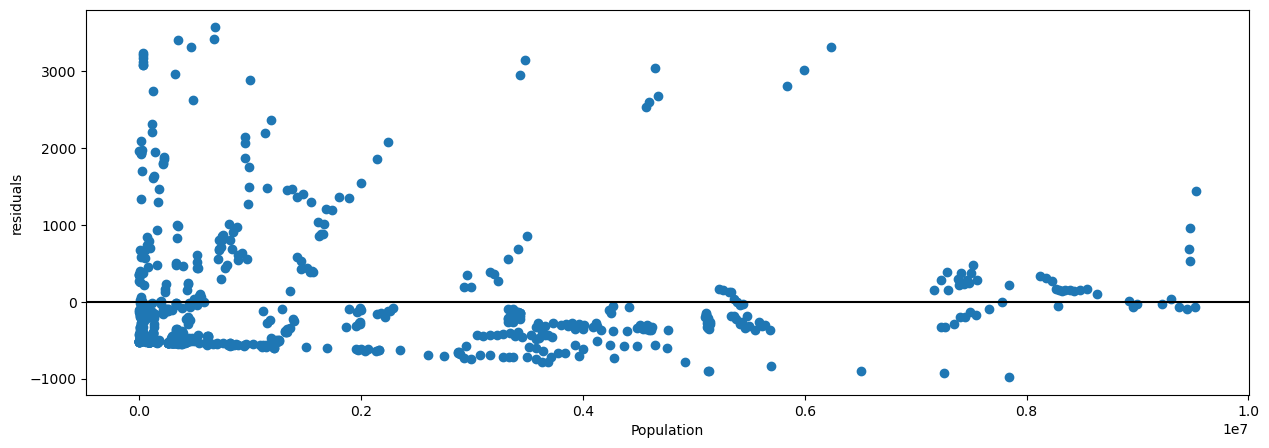

In [50]:
# Plotting residuals vs. Population

fig, ax = plt.subplots(figsize=(15,5))

ax.scatter(df["Population"], results.resid)
ax.axhline(y=0, color="black")

ax.set_xlabel("Population")
ax.set_ylabel("residuals");

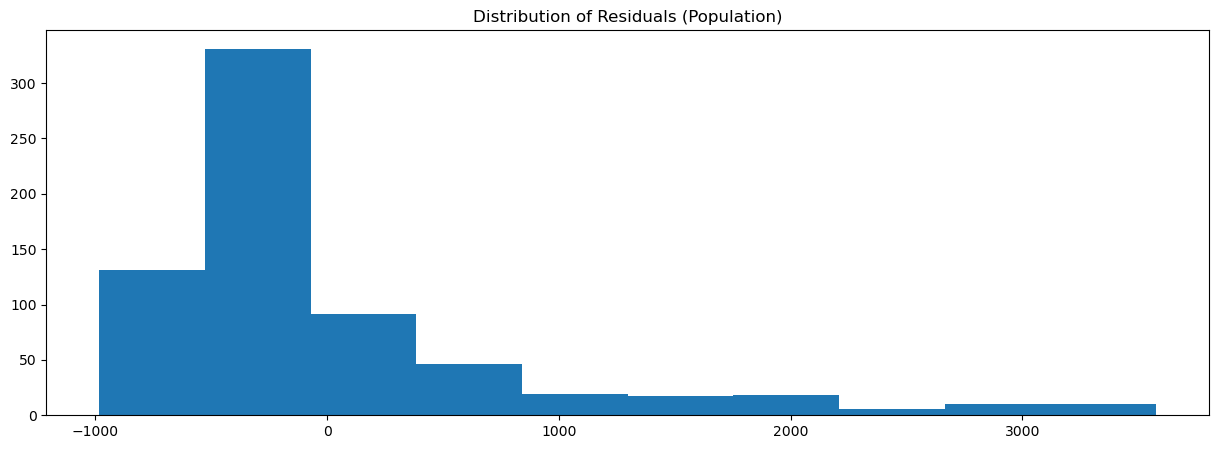

In [51]:
# Plotting residual histogram
fig, ax = plt.subplots(figsize=(15,5))

ax.hist(results.resid)
ax.set_title("Distribution of Residuals (Population)");

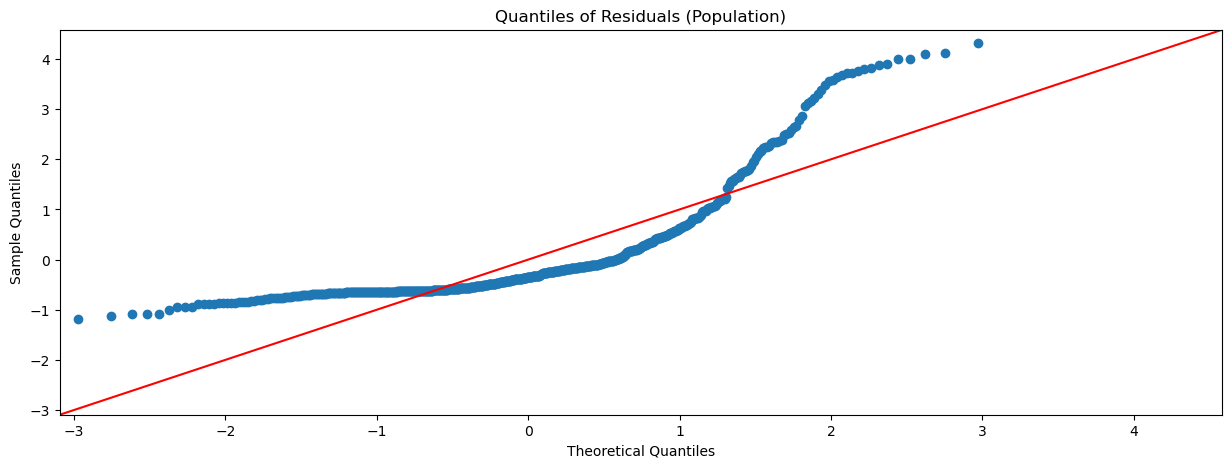

In [52]:
# Plotting residual Q-Q plot
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.qqplot(results.resid, dist=norm, line="45", fit=True, ax=ax)
ax.set_title("Quantiles of Residuals (Population)")
plt.show()

In [53]:

# Determine X and y values
X = df[["Income composition of resources"]]
y = df["Suicides number"]

# Create an OLS model
model = sm.OLS(endog=y, exog=sm.add_constant(X))
# Get model results
results = model.fit()

# Display results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Suicides number   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     56.79
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           1.56e-13
Time:                        10:03:21   Log-Likelihood:                -5515.0
No. Observations:                 679   AIC:                         1.103e+04
Df Residuals:                     677   BIC:                         1.104e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

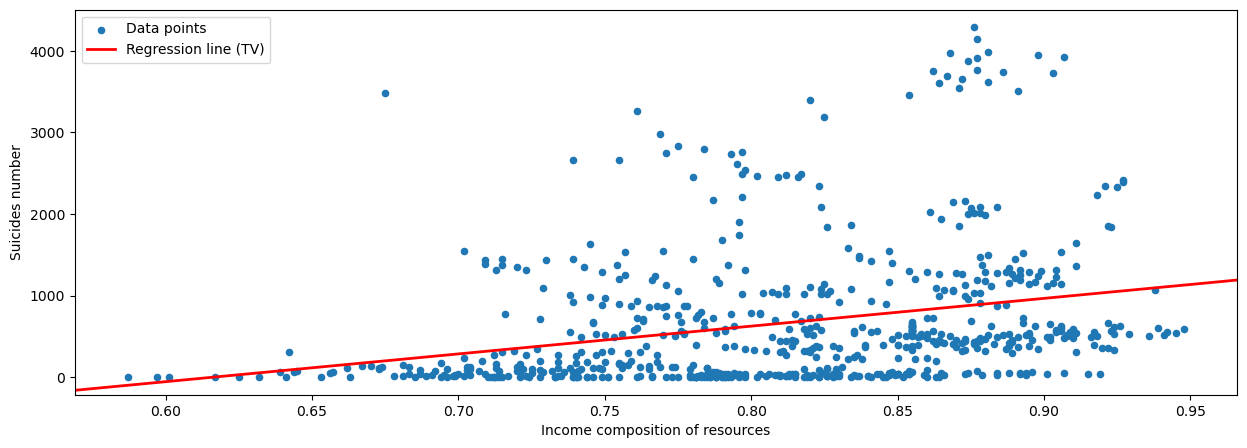

In [54]:
# abline_plot version of model fit
fig, ax = plt.subplots(figsize=(15,5))
df.plot(x="Income composition of resources", y="Suicides number", kind="scatter", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results, label="Regression line (TV)", c="red", linewidth=2, ax=ax)
ax.legend()
plt.show()

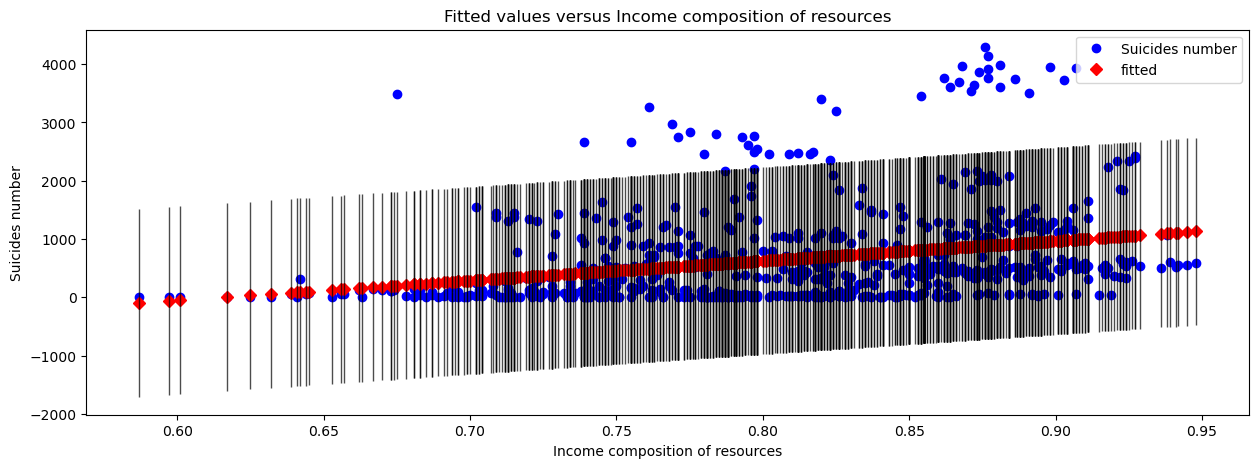

In [55]:
# plot_fit version of model fit
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.plot_fit(results, "Income composition of resources", ax=ax)
plt.show()

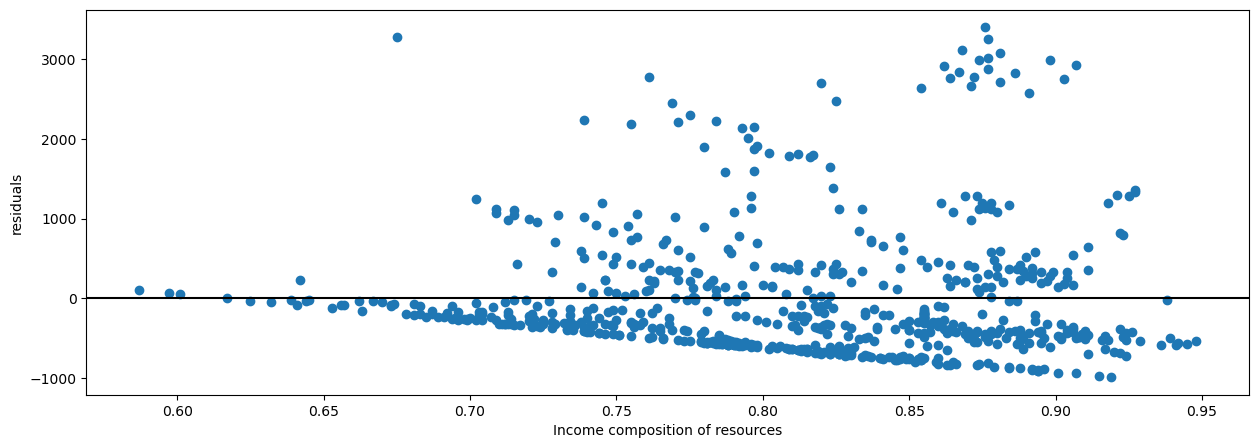

In [56]:
# Plotting residuals vs. Income composition of resources

fig, ax = plt.subplots(figsize=(15,5))

ax.scatter(df["Income composition of resources"], results.resid)
ax.axhline(y=0, color="black")

ax.set_xlabel("Income composition of resources")
ax.set_ylabel("residuals");

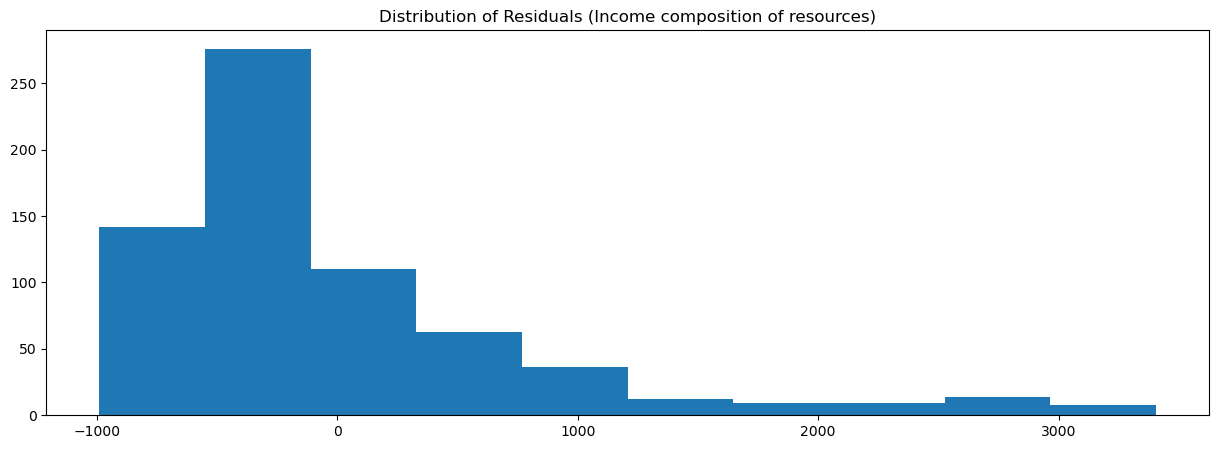

In [57]:
# Plotting residual histogram
fig, ax = plt.subplots(figsize=(15,5))

ax.hist(results.resid)
ax.set_title("Distribution of Residuals (Income composition of resources)");

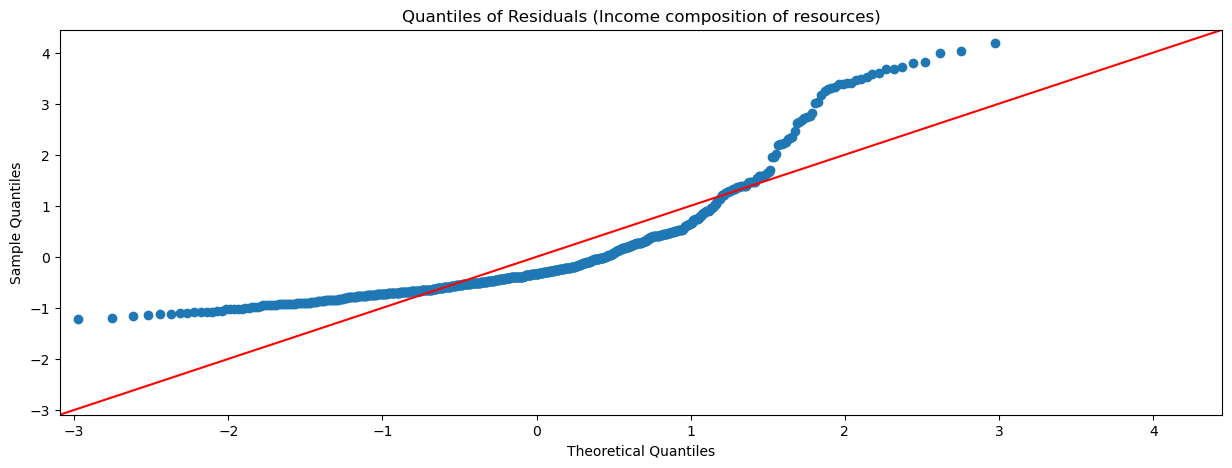

In [58]:
# Plotting residual Q-Q plot
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.qqplot(results.resid, dist=norm, line="45", fit=True, ax=ax)
ax.set_title("Quantiles of Residuals (Income composition of resources)")
plt.show()

In [59]:

# Determine X and y values
X = df[["Schooling"]]
y = df["Suicides number"]

# Create an OLS model
model = sm.OLS(endog=y, exog=sm.add_constant(X))
# Get model results
results = model.fit()

# Display results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Suicides number   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     93.04
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           1.02e-20
Time:                        10:03:23   Log-Likelihood:                -5498.6
No. Observations:                 679   AIC:                         1.100e+04
Df Residuals:                     677   BIC:                         1.101e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1672.1886    244.121     -6.850      0.0

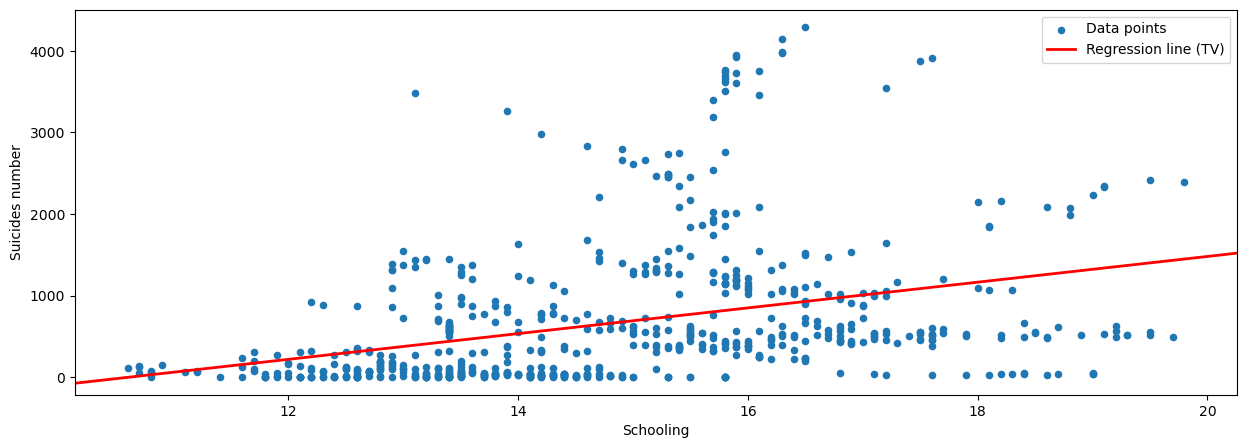

In [60]:
# abline_plot version of model fit
fig, ax = plt.subplots(figsize=(15,5))
df.plot(x="Schooling", y="Suicides number", kind="scatter", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results, label="Regression line (TV)", c="red", linewidth=2, ax=ax)
ax.legend()
plt.show()

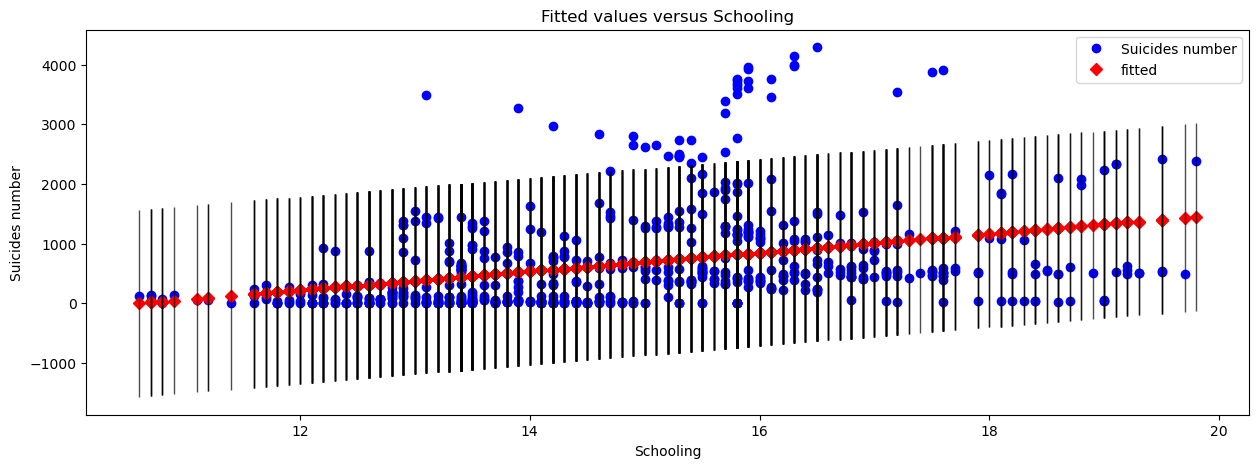

In [61]:
# plot_fit version of model fit
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.plot_fit(results, "Schooling", ax=ax)
plt.show()

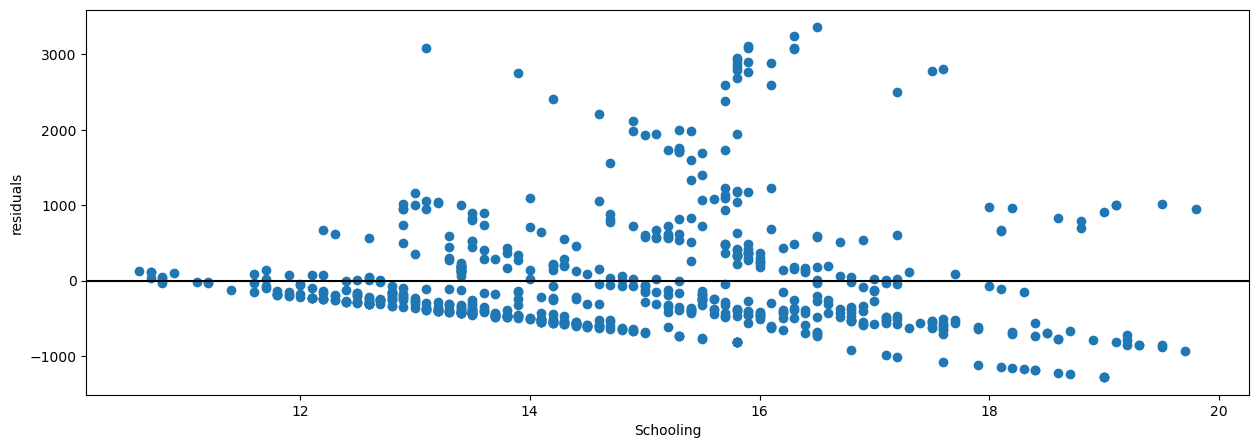

In [62]:
# Plotting residuals vs. Schooling

fig, ax = plt.subplots(figsize=(15,5))

ax.scatter(df["Schooling"], results.resid)
ax.axhline(y=0, color="black")

ax.set_xlabel("Schooling")
ax.set_ylabel("residuals");

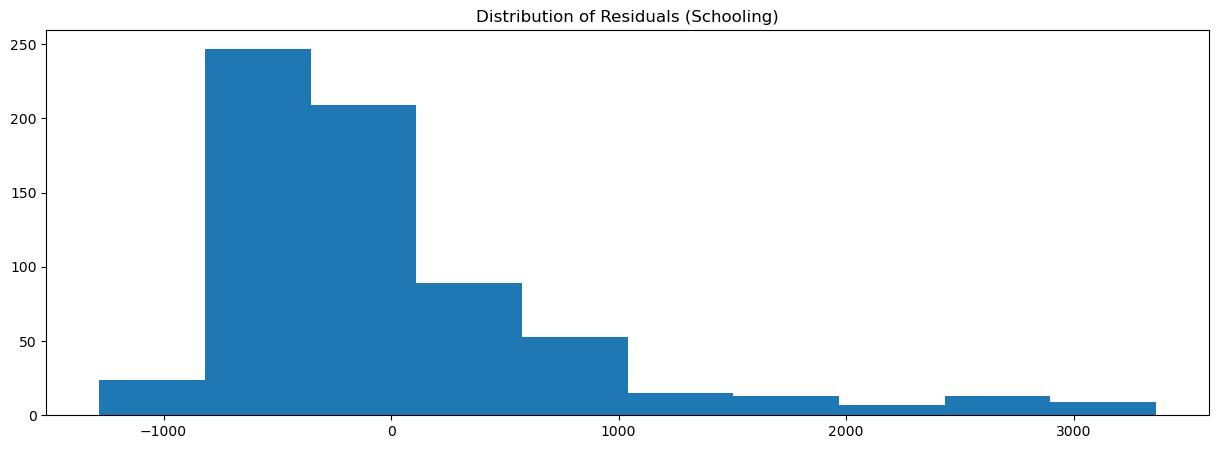

In [63]:
# Plotting residual histogram
fig, ax = plt.subplots(figsize=(15,5))

ax.hist(results.resid)
ax.set_title("Distribution of Residuals (Schooling)");

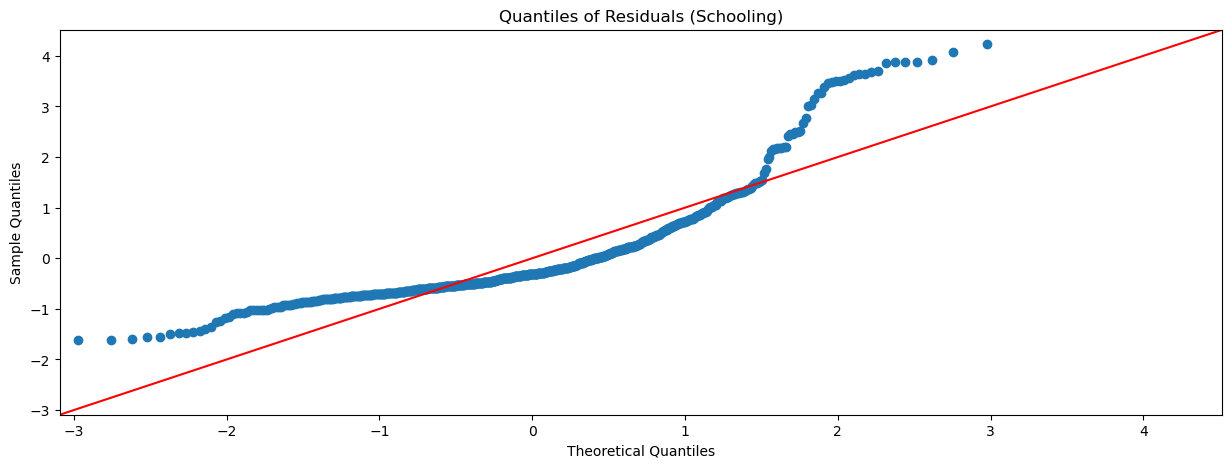

In [64]:
# Plotting residual Q-Q plot
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.qqplot(results.resid, dist=norm, line="45", fit=True, ax=ax)
ax.set_title("Quantiles of Residuals (Schooling)")
plt.show()